In [4]:
import numpy as np

numG=3
a=1
Gx = np.array([])
Gy = np.array([]) #why again, why is this different?
B1=2*np.pi/a *np.array([1, 1/np.sqrt(3)])
B2=2*np.pi/a *np.array([1, -1/np.sqrt(3)])
for i in range(-numG,numG+1):
    for j in range(-numG,numG+1):
        Gx = np.append(Gx,(i*B1[0]+j*B2[0]))
        Gy = np.append(Gy,(i*B1[1]+j*B2[1]))
    
G = np.array([Gx,Gy]).T
numG = len(G)
print(numG)

49


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tidy3d as td
from shapely.geometry import Polygon, Point, MultiPolygon
from shapely.affinity import translate
import matplotlib.colors
import time
from matplotlib.patches import Rectangle
from matplotlib.patches import Polygon as poly
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.path import Path

In [56]:
a=np.zeros([7*15, 2])
i=-3
j=-5
for x in range(len(a)):
    a[x][0]=i
    a[x][1]=j
    j=j+1
    if j==10:
        j=-5
        i=i+1

a

array([[-3., -5.],
       [-3., -4.],
       [-3., -3.],
       [-3., -2.],
       [-3., -1.],
       [-3.,  0.],
       [-3.,  1.],
       [-3.,  2.],
       [-3.,  3.],
       [-3.,  4.],
       [-3.,  5.],
       [-3.,  6.],
       [-3.,  7.],
       [-3.,  8.],
       [-3.,  9.],
       [-2., -5.],
       [-2., -4.],
       [-2., -3.],
       [-2., -2.],
       [-2., -1.],
       [-2.,  0.],
       [-2.,  1.],
       [-2.,  2.],
       [-2.,  3.],
       [-2.,  4.],
       [-2.,  5.],
       [-2.,  6.],
       [-2.,  7.],
       [-2.,  8.],
       [-2.,  9.],
       [-1., -5.],
       [-1., -4.],
       [-1., -3.],
       [-1., -2.],
       [-1., -1.],
       [-1.,  0.],
       [-1.,  1.],
       [-1.,  2.],
       [-1.,  3.],
       [-1.,  4.],
       [-1.,  5.],
       [-1.,  6.],
       [-1.,  7.],
       [-1.,  8.],
       [-1.,  9.],
       [ 0., -5.],
       [ 0., -4.],
       [ 0., -3.],
       [ 0., -2.],
       [ 0., -1.],
       [ 0.,  0.],
       [ 0.,  1.],
       [ 0.,

In [32]:

def make_regular_polygon(n, x_centre=0, y_centre=0, radial=False, radial_distance=0, side_length=0, rotation_angle=0):
    '''
    
    Parameters
    ----------
    n : integer
        Number of sides of polygon.
    x_centre : float
        x-coordinate of centre.
    y_centre : float
        y-coordinate of centre.
    radial_distance : float
        radial distance
    side_length: float
        length of side
    rotation_angle : float
        angle by which the polygon is rotated, given that 
        the first point starts from (r, 0)

    Returns 
    -------
    (x, y) ->vertices of the polygon

    '''

    vertices=np.zeros((n, 2))
    angle=np.linspace(0, 2*np.pi, n, endpoint=False)
    angle+=(np.pi/2 if n%2 else np.pi/n)
    angle+=rotation_angle
    if (radial):
        r=radial_distance
    else:
        r=side_length/(2*np.sin(np.pi/n))
    
    for i in range(n):
        vertices[i][0]=x_centre+r*np.cos(angle[i])
        vertices[i][1]=y_centre+r*np.sin(angle[i])
    #vertices = np.column_stack((x, y))
    #print(vertices)
    return vertices

def initialize_lattice_parameters(a):
    a=a
    c0=td.C_0
        
    #reciprocal lattice vectors
    B1=2*np.pi/a *np.array([1, 1/np.sqrt(3)])
    B2=2*np.pi/a *np.array([1, -1/np.sqrt(3)])
    
    return a, c0, B1, B2

def initialize_hole_parameters(a, ratio_1, ratio_2):
    l1=a*ratio_1
    l2=a*ratio_2
    
    return l1, l2

def one_unit_cell (n, a, a1, a2, x_centre_1=0, y_centre_1=0, x_centre_2=0, y_centre_2=0, rotation_angle_1=0, rotational_angle_2=np.pi, radial=False, symmetry_seperation=0):
    '''

    Parameters
    ----------
    n : number of sides of inside polygons
    a : lattice constant/radius of circle in which polygon lies
    a1 : radius/length of one polygon
    a2 : radius/length of 2nd polygon
    x_centre_1 : centre of 1st polygon x coord
    y_centre_1 : centre of 1st polygon y coord
    x_centre_2 : centre of 2nd polygon x coord
    y_centre_2 : Tcentre of 2nd polygon y coord
    rotation_angle : angle rotated through 
    radial : radial polygon or side length
        The default is False.
    radial_distance : 
        '''
    if (radial):
        r1=a1
        r2=a1
        l1=0 
        l2=0
    else:
        r1=0
        r2=0 
        l1=a1 
        l2=a2
        
    poly_1=make_regular_polygon(n=n, x_centre=x_centre_1, y_centre=y_centre_1, radial=radial, radial_distance=r1, side_length=l1, rotation_angle=rotation_angle_1)
    polygon_1=Polygon(poly_1)
    poly_2=make_regular_polygon(n=n, x_centre=x_centre_2, y_centre=y_centre_2, radial=radial, radial_distance=r2, side_length=l2, rotation_angle=rotational_angle_2)
    polygon_2=Polygon(poly_2)
    
    unit = translate(polygon_1, 0, a/(2 * np.sqrt(3))).union(translate(polygon_2, 0, -a/(2 * np.sqrt(3)))) #couldn't understand the exact reason behind these particular coords
    unit = unit.union(translate(unit,  a/2, a*np.sqrt(3)/2))
    unit = unit.union(translate(unit, -a/2, a*np.sqrt(3)/2))
    unit = translate(unit, 0, -np.sqrt(3)*a/2)
    return unit

def dielectric_function(ed, ea, unit, a, x_start, x_end, y_start, y_end, N_sp, tolerance=0,  rhombus=True):
    
    n1 = np.linspace(x_start, x_end, 2*N_sp, endpoint=True)
    n2 = np.linspace(y_start, y_end, 2*N_sp, endpoint=True)
    
    N1, N2 = np.meshgrid(n1, n2)
   
    X = a * N1
    Y = a * np.sqrt(3) * N2
    
    if (rhombus==True):
        dx = a / (2 * N_sp)
        for i in range(2 * N_sp):
            X[i, :] += dx / 2 * (i)
    
    
    xi = X.reshape((X.size,1), order = 'F')
    yi = Y.reshape((Y.size,1), order = 'F')
   
    
    unit_expanded = unit.buffer(tolerance)    
    #unit_contracted = unit.buffer(-tolerance)
    
    def is_inside_unit_polygon(x, y):
        point = Point(x, y)  
        return unit_expanded.contains(point)
    
    is_inside_vec = np.vectorize(is_inside_unit_polygon)
    eps = np.where(is_inside_vec(xi, yi), ea, ed)
    inv_eps=1/eps
    
    plt.close()
    plt.figure(figsize=(8, 6))
    if (rhombus==True):
        plt.axes().set_aspect(1)
    else:
        plt.axes().set_aspect(0.5)
    plt.scatter(xi, yi, c=inv_eps, s=1, cmap='jet')
    plt.xlabel('x [m]')
    plt.ylabel('y [m]')
    plt.colorbar(label=r'$\epsilon(x, y)$')
    plt.title('Spatial Dielectric Distribution')
    plt.show()

    return inv_eps, xi, yi, X, Y


def specify_dielectric_function_rectangle(a, unit):
    import numpy as np
    import matplotlib.pyplot as plt
    from shapely.geometry import Point
    ed = 9  # Relative permeability of shaded region (dielectric)
    ea = 1  # Relative permeability of white space (air)

    # Spatial coordinates
    N_sp = 100
    n1 = np.linspace(-0.5, 0.5, 2*N_sp, endpoint=False)
    n2 = np.linspace(-0.5, 0.5, 2*N_sp, endpoint=False)
  
    N1, N2 = np.meshgrid(n1, n2)

    # Generating spatial mesh
    X = a * N1
    Y = a * np.sqrt(3) * N2
    xi = X.reshape((X.size,1), order = 'F')
    yi = Y.reshape((Y.size,1), order = 'F')

    # Define a small tolerance value for boundary checks
    tolerance = 1e-8 * a  # This can be adjusted based on the scale of the problem

    # Buffer the polygon slightly to create a tolerance zone
    unit_expanded = unit.buffer(tolerance)    # Slightly expand the polygon
    unit_contracted = unit.buffer(-tolerance) # Slightly contract the polygon

    def is_inside_unit_polygon(x, y):
        point = Point(x, y)
        # Check if the point is inside the expanded polygon but not outside the contracted one
        return unit_expanded.contains(point)

    # Vectorizing the function for array operations
    is_inside_unit_polygon_vec = np.vectorize(is_inside_unit_polygon)

    # Recalculating the spatial dielectric distribution "exy" and its inverse "inv_exy"
    exy = np.where(is_inside_unit_polygon_vec(xi, yi), ea, ed)
    inv_exy = 1 / exy
    print(inv_exy[len(inv_exy)//2])
    exy_reshaped_1 = inv_exy.reshape(N1.shape, order = 'F')
    
    plt.close()
    plt.figure(figsize=(8, 6))
    plt.axes().set_aspect(0.5)
    plt.scatter(xi, yi, c=inv_exy, s=1, cmap='jet')
    plt.xlabel('x [m]')
    plt.ylabel('y [m]')
    plt.colorbar(label=r'$\epsilon(x, y)$')
    plt.title('Spatial Dielectric Distribution')
    plt.show()
    return xi, yi, inv_exy

def fourier_coefficients_reshaped(a, ng, B1, B2, xi, yi, inv_eps):
    m_max, n_max = 2 * ng, 2 * ng
    m = np.arange(-m_max, m_max + 1)
    n = np.arange(-n_max, n_max + 1)
    M, N = np.meshgrid(m, n)

    G_len=M.size
    
    M_lin = M.reshape((G_len, 1), order='C')
    N_lin = N.reshape((G_len, 1), order='C')
    
    ni=len(xi)
    
    chi = np.zeros((G_len, 1), dtype=complex)
    for i in range(G_len):
       phi = ((B1[0]*M_lin[i] + B2[0]*N_lin[i]) * xi) + ((B1[1]*M_lin[i] + B2[1]*N_lin[i]) * yi)
       chi[i] = np.sum(inv_eps * np.exp(-1j * phi)) / ni

    chi_matrix = chi.reshape(M.shape, order='F')
    
    # Plot chi(G)
    plt.figure()
    plt.imshow(np.abs(chi_matrix), extent=[-m_max-0.5, m_max+0.5, -n_max-0.5, n_max+0.5],
               norm=matplotlib.colors.LogNorm())
    plt.colorbar(label=r'$\chi(G)$')
    plt.title('Chi(G) Matrix')
    plt.set_cmap('jet')
    plt.show()

    
    #chi(G-G')
    mp = np.arange(-ng, ng + 1)
    np_arr = np.arange(-ng, ng + 1)
    Np, Mp = np.meshgrid(np_arr, mp)

    G_lenp = Mp.size
    Mp_lin = Mp.reshape(G_lenp, order='F')
    Np_lin = Np.reshape(G_lenp, order='F')

    
    chi_p = []
    
    for i in range(G_lenp):
        crop = (np.abs(M_lin + Mp_lin[i]) <= ng) & (np.abs(N_lin + Np_lin[i]) <= ng)
        ### didnt understand why
        chi_p.append(chi[crop])

    chi_p = np.column_stack(chi_p)

    # Plot Chi(G-G')
    
    plt.figure()
    plt.imshow(np.abs(chi_p), norm=matplotlib.colors.LogNorm())
    plt.xlabel("G'")
    plt.ylabel("G")
    plt.colorbar(label=r'$\chi(G-G)$')
    plt.title("Chi(G-G') Matrix")
    plt.show()

    return chi_p, chi, M_lin, N_lin, Mp_lin, Np_lin


def eig_val_band_structure(a, numG, B1, B2, chi_p):
    #high symmetry points
    G = np.array([0, 0])
    M = np.array([0, (2 * np.pi / a * (1 / 3) * (np.sqrt(3)))])
    K = np.array([2 * np.pi / a * (-1/3), (2 * np.pi / a * (1 / 3) * (np.sqrt(3)))])
    N1=N2=N3=100
    
    kx = np.concatenate([np.linspace(G[0], M[0], N1, endpoint=False), np.linspace(M[0], K[0], N2, endpoint=False),
                        np.linspace(K[0], G[0], N3)])
    ky = np.concatenate([np.linspace(G[1], M[1], N1, endpoint=False), np.linspace(M[1], K[1], N2, endpoint=False),
                        np.linspace(K[1], G[1], N3)])
    
    
    
    Gx = np.array([])
    Gy = np.array([]) #why again, why is this different?
    for i in range(-numG,numG+1):
        for j in range(-numG,numG+1):
            Gx = np.append(Gx,(i*B1[0]+j*B2[0]))
            Gy = np.append(Gy,(i*B1[1]+j*B2[1]))
    
    G = np.array([Gx,Gy]).T
    numG = len(G)

    Gx = G[:, 0].reshape(1, numG)  
    Gy = G[:, 1].reshape(1, numG)
    
    kx_expanded = kx[:, np.newaxis]  # Shape (len(kx), 1)
    ky_expanded = ky[:, np.newaxis]  # Shape (len(kx), 1)
    
    # Precompute the components of the matrix multiplication
    kx_term = kx_expanded + Gx  # Shape (len(kx), numG)
    ky_term = ky_expanded + Gy  # Shape (len(kx), numG)
    
    kx_term_outer = kx_term[:, :, np.newaxis] * kx_term[:, np.newaxis, :]  # Shape (len(kx), numG, numG)
    ky_term_outer = ky_term[:, :, np.newaxis] * ky_term[:, np.newaxis, :]  # Shape (len(kx), numG, numG)

    # Combine the kx and ky terms
    combined_terms = kx_term_outer + ky_term_outer  # Shape (len(kx), numG, numG)

    # Finally, compute the M matrix using broadcasting and element-wise multiplication
    M = chi_p[np.newaxis, :, :] * combined_terms  # Shape (len(kx), numG, numG)
                
    # Eigen-states computation
    dispe = np.zeros((numG, len(kx)))
    eigenvectors_k=[]
    for countK in range(len(kx)):
        MM = M[countK, :, :]
        eigenvalues, eigenvectors = np.linalg.eig(MM)
        sort_idx=np.argsort(np.real(eigenvalues))
        dispe[:, countK] = np.sqrt(eigenvalues[sort_idx]) * a / (2 * np.pi)
        eigenvectors=eigenvectors[:, sort_idx]
        eigenvectors_k.append(eigenvectors)
    
    # Plotting the band structure
    plt.figure()
    ax1 = plt.gca()
    for u in range(7):
        plt.plot(np.abs(dispe[u, :]), 'r', linewidth=1)
        if min(dispe[u + 1, :]) > max(dispe[u, :]):
            rect_height = min(dispe[u + 1, :]) - max(dispe[u, :])
            rect = Rectangle((0, max(dispe[u, :])), N1 + N2 + N3, rect_height, facecolor='lightblue')
            ax1.add_patch(rect)

    # Labeling the axes+
    plt.title('Band Structure')
    plt.xticks([0, N1, N1 + N2, N1 + N2 + N3], ['G', 'M', 'K', 'G'])
    plt.ylabel('Frequency ωa/2πc', fontsize=16)
    plt.xlabel('Wavevector', fontsize=16)
    plt.ylim([0, 0.7])
    plt.xlim([0, N1+N2+N3])
    plt.grid(True)
    plt.show()
    
    return kx, ky, np.array(eigenvectors_k), dispe, G, Gx, Gy, numG

def high_symmetry_points():
    # Define high symmetry points
    Gamma = np.array([0, 0])
    M = np.array([0, (2 * (1 / 3) * (np.sqrt(3)))])
    K = np.array([2 * (-1/3), (2 * (1 / 3) * (np.sqrt(3)))])

    # Plot the triangle with the vertices G, M, and K
    vertices = np.array([Gamma, M, K, Gamma])  # Close the triangle by adding G at the end
    return Gamma, M, K, vertices

def H_field(eigenvectors_k, kx, ky, G, X, Y, k_idx, K, band_idx, a):
    Hr=[]
    #kx=kx[k_idx]
    #ky=ky[k_idx]
    kx=K[0]*np.pi/a
    ky=K[1]*np.pi/a

    hg=eigenvectors_k[k_idx][:, band_idx]
    x=X[0]
    y=Y[:, 0]

    for xi in x:
        for yi in y:
            h1=np.sum(hg*np.exp(1j*((G[:, 0]+kx)*xi+(G[:, 1]+ky)*yi)))
            Hr.append(h1)

    Hr=np.array(Hr)
    Hr=Hr.reshape(int(np.sqrt(len(Hr))), -1)
    Hr_magn=np.abs(Hr)
    
    plt.axes().set_aspect(1)
    plt.pcolormesh(X, Y, np.angle(Hr), cmap='twilight_shifted', shading='auto')
    plt.show()
    
    plt.axes().set_aspect(1)
    plt.pcolormesh(X/a, Y/a, Hr_magn, cmap='viridis', shading='auto')
    plt.show()

    return Hr

import numpy as np

def find_indices_from_flat(KX_lin, KY_lin, k1, k2):
    K_points = np.column_stack((KX_lin, KY_lin))
    dist_k1 = np.sqrt((K_points[:, 0] - k1[0])**2 + (K_points[:, 1] - k1[1])**2)
    dist_k2 = np.sqrt((K_points[:, 0] - k2[0])**2 + (K_points[:, 1] - k2[1])**2)
    index_k1 = np.argmin(dist_k1)
    index_k2 = np.argmin(dist_k2)
    return index_k1, index_k2


def calculate_magnetic_field_and_plot(a, ng, B1, B2, KX_lin, KY_lin, H, H_2, G, Gx, Gy, X, Y, xi, yi, Mp_lin, Np_lin, dispe, inv_exy, c):
    from scipy.constants import epsilon_0

    MM, MMP = np.meshgrid(Mp_lin, Mp_lin)
    NN, NNP = np.meshgrid(Np_lin, Np_lin)
    
    Gx = B1[0] * MM + B2[0] * NN
    Gy = B1[1] * MM + B2[1] * NN
    
    k1 = np.array([(2 * np.pi / a * (1 / 3)), (2 * np.pi / a * (1 / np.sqrt(3)))])
    k2 = np.array([(2 * np.pi / a * (-1 / 3)), (2 * np.pi / a * (1 / np.sqrt(3)))])
    
    index_k1, index_k2 = find_indices_from_flat(KX_lin, KY_lin, k1, k2)

    Hz_k1 = np.zeros(len(xi), dtype=complex)
    Hz_k2 = np.zeros(len(xi), dtype=complex)
    Hz_k1_2 = np.zeros(len(xi), dtype=complex)
    
    E_parellel_k1 = np.zeros((len(xi), 2), dtype=complex)  
    E_parellel_k1_2 = np.zeros((len(xi), 2), dtype=complex)
    
    for i in range(len(xi)):
        phi_k1 = (((k1[0] + Gx) * (xi[i])) + ((k1[1] + Gy) * (yi[i])))
        Hz_k1[i] = np.sum(H[index_k1] * np.exp(1j * phi_k1))
        phi_k2 = (((k2[0] + Gx) * (xi[i])) + ((k2[1] + Gy) * (yi[i])))
        Hz_k2[i] = np.sum(H[index_k2] * np.exp(1j * phi_k2))
        
        Hz_k1_2[i] = np.sum(H_2[index_k1] * np.exp(1j * phi_k1))
        
        E_parellel_k1[i, 0] = - np.sum((k1[1] + Gy) * H[index_k1] * np.exp(1j * phi_k1)) / (inv_exy[i] * dispe[0, index_k1] * epsilon_0)
        E_parellel_k1[i, 1] =   np.sum((k1[0] + Gx) * H[index_k1] * np.exp(1j * phi_k1)) / (inv_exy[i] * dispe[0, index_k1] * epsilon_0)
        
        E_parellel_k1_2[i, 0] = - np.sum((k1[1] + Gy) * H_2[index_k1] * np.exp(1j * phi_k1)) / (inv_exy[i] * ((dispe[0, index_k1] * 2 * np.pi * c) / a) * epsilon_0)
        E_parellel_k1_2[i, 1] =   np.sum((k1[0] + Gx) * H_2[index_k1] * np.exp(1j * phi_k1)) / (inv_exy[i] * ((dispe[0, index_k1] * 2 * np.pi * c) / a) * epsilon_0)

    # plt.figure(figsize=(8, 6), dpi=300)
    # plt.imshow(np.real(Hz_k1), extent=(X[0, 0], X[0, -1], Y[0, 0], Y[-1, 0]), cmap='bwr', aspect='auto')
    # plt.xlabel("X")
    # plt.ylabel("Y")
    # plt.colorbar(label="Hz")
    # plt.title("Magnetic Field (Hz)")
    # plt.show()

    norm = matplotlib.colors.TwoSlopeNorm(vcenter=0, vmin=-np.real(Hz_k1).max(), vmax=np.real(Hz_k1).max())
    plt.figure(figsize=(8, 6), dpi=300)
    plt.axes().set_aspect(1)
    plt.scatter(xi, yi, c=np.real(Hz_k1), s=1, cmap='bwr', norm=norm)
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.colorbar(label="Hz")
    plt.title("Magnetic Field (Real Part) (Hz)")
    plt.show()
    
    plt.figure(figsize=(8, 6), dpi=300)
    plt.axes().set_aspect(1)
    plt.scatter(xi, yi, c=np.absolute(Hz_k1), s=1, cmap='bwr')
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.colorbar(label="Hz")
    plt.title("Absolute Magnetic Field (|Hz|)")
    plt.show()

    H_phase = np.angle(Hz_k1)
    H_phase[H_phase < 0] += 2 * np.pi
    plt.figure(figsize=(8, 6), dpi=300)
    plt.axes().set_aspect(1)
    plt.scatter(xi, yi, c=H_phase, s=1, cmap='twilight_shifted')
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.colorbar(label="Phase")
    plt.title("Phase of Magnetic Field (Hz) (in Radians)")
    plt.show()
    
    norm = matplotlib.colors.TwoSlopeNorm(vcenter=0, vmin=-np.real(Hz_k1_2).max(), vmax=np.real(Hz_k1_2).max())
    plt.figure(figsize=(8, 6), dpi=300)
    plt.axes().set_aspect(1)
    plt.scatter(xi, yi, c=np.real(Hz_k1_2), s=1, cmap='bwr', norm=norm)
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.colorbar(label="Hz")
    plt.title("Magnetic Field (Real Part) (Hz)")
    plt.show()
    
    plt.figure(figsize=(8, 6), dpi=300)
    plt.axes().set_aspect(1)
    plt.scatter(xi, yi, c=np.absolute(Hz_k1_2), s=1, cmap='bwr')
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.colorbar(label="Hz")
    plt.title("Absolute Magnetic Field (|Hz|)")
    plt.show()

    H_phase = np.angle(Hz_k1_2)
    H_phase[H_phase < 0] += 2 * np.pi
    plt.figure(figsize=(8, 6), dpi=300)
    plt.axes().set_aspect(1)
    plt.scatter(xi, yi, c=H_phase, s=1, cmap='twilight')
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.colorbar(label="Phase")
    plt.title("Phase of Magnetic Field (Hz) (in Radians)")
    plt.show()

    # Extract E-field components (real part for visualization)
    Ex_k1 = np.real(E_parellel_k1[:, 0]).reshape(X.shape)
    Ey_k1 = np.real(E_parellel_k1[:, 1]).reshape(X.shape)

    Ex_k1_2 = np.real(E_parellel_k1_2[:, 0]).reshape(X.shape)
    Ey_k1_2 = np.real(E_parellel_k1_2[:, 1]).reshape(X.shape)

    # Extract H-field components (conjugate for Poynting calculation)
    Hz_k1_conj = np.conjugate(Hz_k1).reshape(X.shape)
    Hz_k1_2_conj = np.conjugate(Hz_k1_2).reshape(X.shape)

    # Compute the time-averaged Poynting vector components
    Sx_k1 = 0.5 * np.real(Ey_k1 * Hz_k1_conj)
    Sy_k1 = -0.5 * np.real(Ex_k1 * Hz_k1_conj)

    Sx_k1_2 = 0.5 * np.real(Ey_k1_2 * Hz_k1_2_conj)
    Sy_k1_2 = -0.5 * np.real(Ex_k1_2 * Hz_k1_2_conj)

    # # Plot the Poynting vector field for E_parellel_k1
    # plt.figure(figsize=(8, 6))
    # plt.quiver(X, Y, Sx_k1, Sy_k1, color="blue")
    # plt.xlabel("X")
    # plt.ylabel("Y")
    # plt.title("Poynting Vector Field for E_parallel_k1")
    # plt.axis("equal")
    # plt.show()

    # # Plot the Poynting vector field for E_parellel_k1_2
    # plt.figure(figsize=(8, 6))
    # plt.quiver(X, Y, Sx_k1_2, Sy_k1_2, color="red")
    # plt.xlabel("X")
    # plt.ylabel("Y")
    # plt.title("Poynting Vector Field for E_parallel_k1_2")
    # plt.axis("equal")
    # plt.show()

    
    return Hz_k1, Hz_k2, Hz_k1_2, xi, yi, E_parellel_k1, E_parellel_k1_2, Sx_k1, Sy_k1, Sx_k1_2, Sy_k1_2


In [70]:
Mp_lin.shape

(361,)

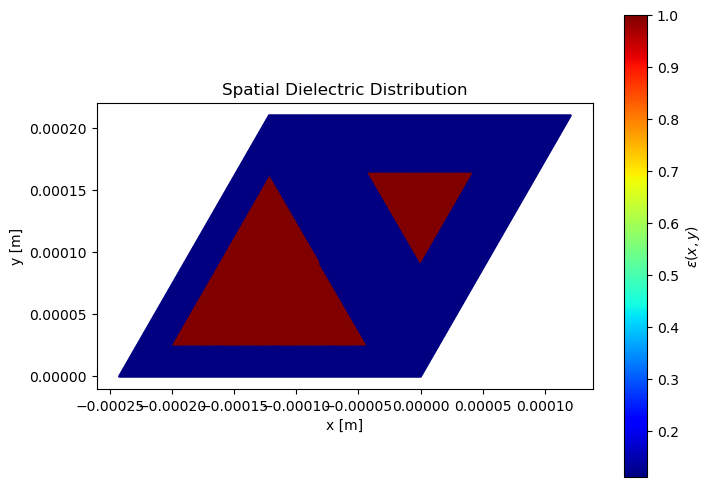

In [4]:
a, c0, B1, B2 = initialize_lattice_parameters(a=242.5 * 10**(-6))
ng=3
l1, l2 = initialize_hole_parameters(a, ratio_1=0.65, ratio_2=0.35)
seperation = 0 * a
rotation_angle = 0
unit = one_unit_cell(n=3, a=a, a1=l1, a2=l2, radial=False)
inv_exy, xi, yi, X, Y = dielectric_function(ed=9, ea=1, unit=unit, a=a, x_start=-1, x_end=0, y_start=0, y_end=0.5, tolerance=1e-8*a, N_sp=100)
#xi, yi, inv_exy = dielectric_function(ed=9, ea=1, unit=unit, a=a, x_start=-0.5, x_end=0.5, y_start=-0.5, y_end=0.5, rhombus=False, tolerance=1e-8*a, N_sp=100)
#xi, yi, X, Y, inv_exy, exy=specify_dielectric_function_rectangle(a, unit, N_sp=100)

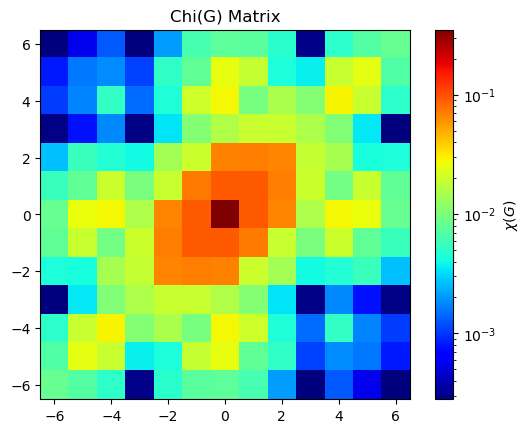

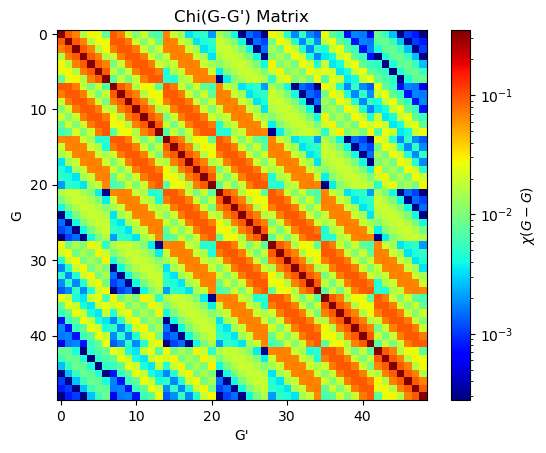

In [5]:
khi_G_Gp, khiG, M_lin, N_lin, Mp_lin, Np_lin= fourier_coefficients_reshaped(a, ng, B1, B2, xi, yi, inv_exy)

C:\Users\Gargi Joshi\AppData\Local\Temp\ipykernel_32124\3623450116.py:309: ComplexWarning: Casting complex values to real discards the imaginary part
  dispe[:, countK] = np.sqrt(eigenvalues[sort_idx]) * a / (2 * np.pi)


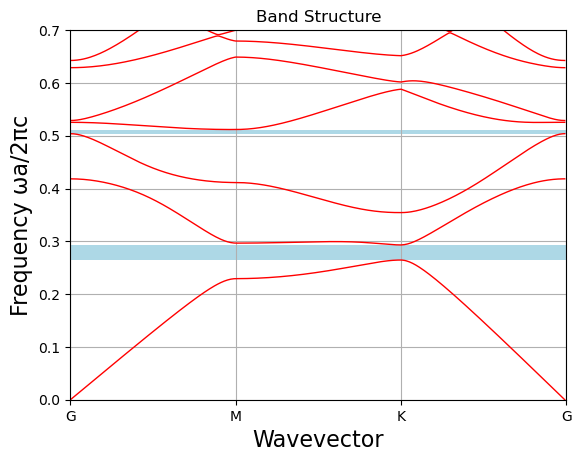

In [34]:
kx, ky, eigenvectors, dispe_1D, G, Gx, Gy, numG = eig_val_band_structure(a, ng, B1, B2, khi_G_Gp)

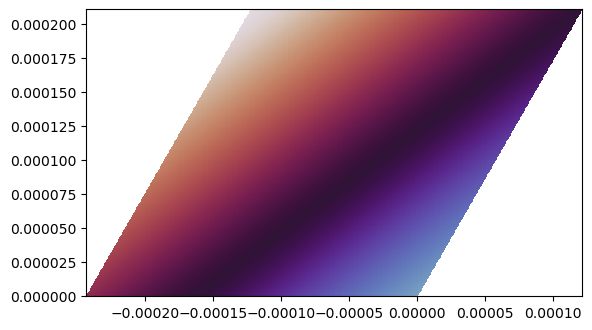

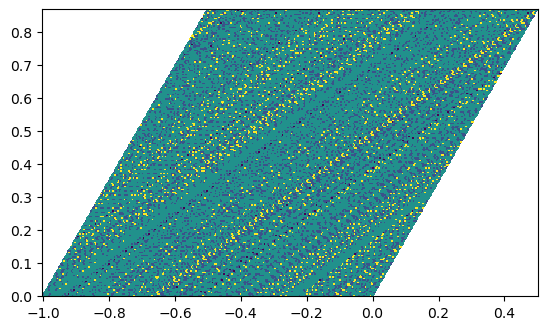

In [ ]:
Gamma, M, K, vertices=high_symmetry_points()
band_idx=0
k_idx=0
#Hr=H_field(eigenvectors, kx, ky, G, X, Y, k_idx, K, band_idx, a)
Hz_k1, Hz_k2, Hz_k1_2, xi, yi, E_parellel_k1, E_parellel_k1_2, Sx_k1, Sy_k1, Sx_k1_2, Sy_k1_2=calculate_magnetic_field_and_plot(a, ng, B1, B2, kx, ky, eigenvectors[:, :, 0], eigenvectors[:, :, 1], G, Gx, Gy, X, Y, xi, yi, Mp_lin, Np_lin, dispe_1D, inv_exy, c0)


In [38]:
Mp_lin.shape

(49,)

In [15]:
G[:, 0]
a=np.array([2, 1])
b=np.array([3, 2])
print(a.shape, b.shape, a*b)

(2,) (2,) [6 2]


In [31]:
x_centre_1=x_centre_2=y_centre_1=y_centre_2=0
radial=False
r1=r2=0
n=3
rotation_angle_1=rotational_angle_2=0
poly_1=make_regular_polygon(n=n, x_centre=x_centre_1, y_centre=y_centre_1, radial=radial, radial_distance=r1, side_length=l1*a, rotation_angle=rotation_angle_1)
polygon_1=Polygon(poly_1)
poly_2=make_regular_polygon(n=n, x_centre=x_centre_2, y_centre=y_centre_2, radial=radial, radial_distance=r2, side_length=l2*a, rotation_angle=rotational_angle_2)
polygon_2=Polygon(poly_2)
poly_1

array([[ 1.35131647e-24,  2.20686728e-08],
       [-1.91120313e-08, -1.10343364e-08],
       [ 1.91120312e-08, -1.10343364e-08]])

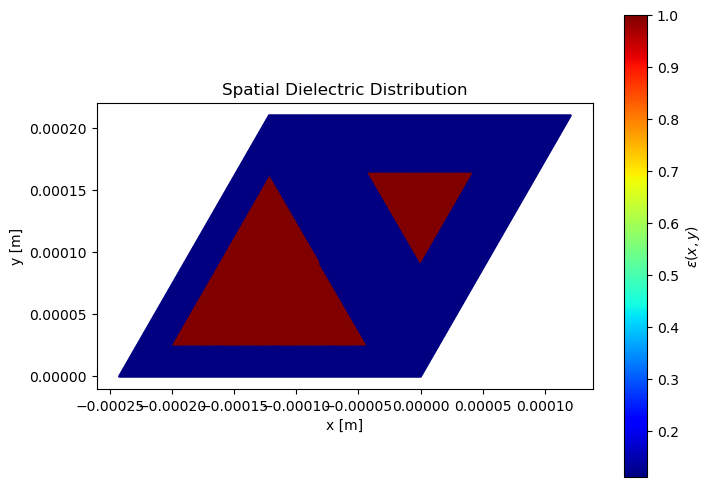

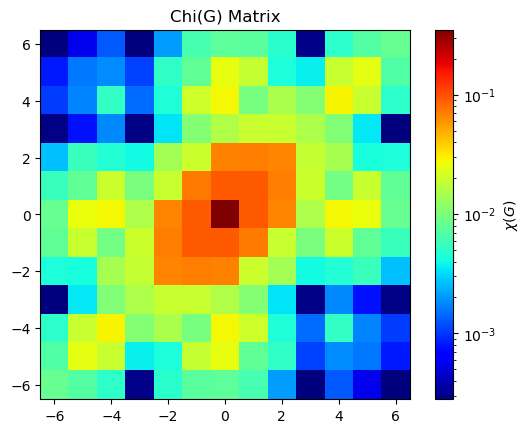

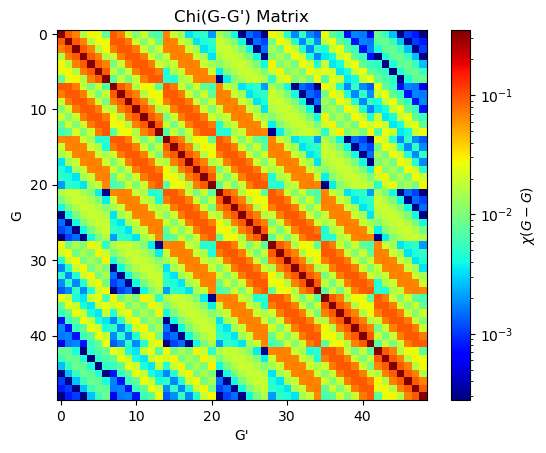

C:\Users\Gargi Joshi\AppData\Local\Temp\ipykernel_32124\624631350.py:325: ComplexWarning: Casting complex values to real discards the imaginary part
  dispe[:, countK] = np.sqrt(eigenvalues[sort_idx]) * a / (2 * np.pi)


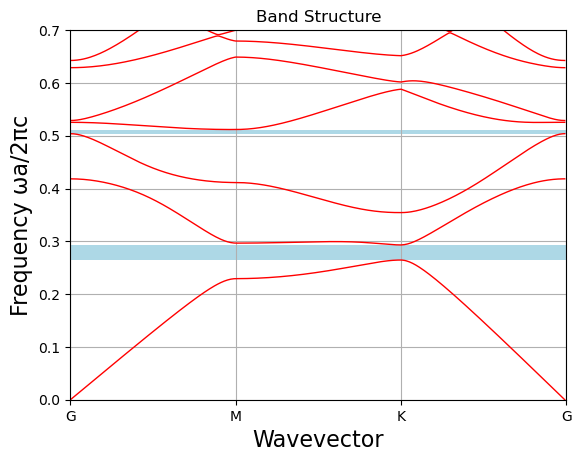

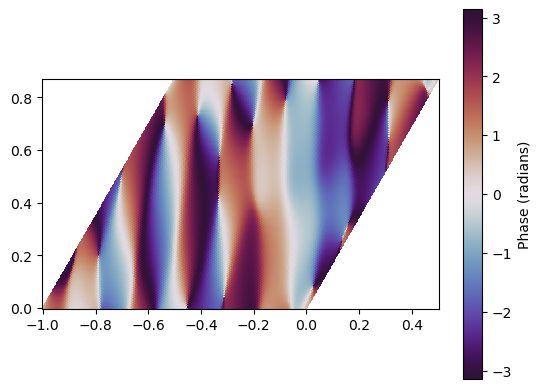

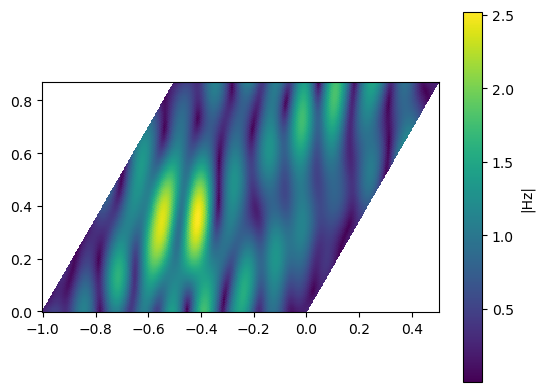

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import tidy3d as td
from shapely.geometry import Polygon, Point, MultiPolygon
from shapely.affinity import translate
import matplotlib.colors
import time
from matplotlib.patches import Rectangle
from matplotlib.patches import Polygon as poly
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.path import Path


def make_regular_polygon(n, x_centre=0, y_centre=0, radial=False, radial_distance=0, side_length=0, rotation_angle=0):
    '''
    
    Parameters
    ----------
    n : integer
        Number of sides of polygon.
    x_centre : float
        x-coordinate of centre.
    y_centre : float
        y-coordinate of centre.
    radial_distance : float
        radial distance
    side_length: float
        length of side
    rotation_angle : float
        angle by which the polygon is rotated, given that 
        the first point starts from (r, 0)

    Returns 
    -------
    (x, y) ->vertices of the polygon

    '''

    vertices=np.zeros((n, 2))
    angle=np.linspace(0, 2*np.pi, n, endpoint=False)
    angle+=(np.pi/2 if n%2 else np.pi/n)
    angle+=rotation_angle
    if (radial):
        r=radial_distance
    else:
        r=side_length/(2*np.sin(np.pi/n))
    
    for i in range(n):
        vertices[i][0]=x_centre+r*np.cos(angle[i])
        vertices[i][1]=y_centre+r*np.sin(angle[i])
    #vertices = np.column_stack((x, y))
    #print(vertices)
    return vertices

def initialize_lattice_parameters(a):
    a=a
    c0=td.C_0
        
    #reciprocal lattice vectors
    B1=2*np.pi/a *np.array([1, 1/np.sqrt(3)])
    B2=2*np.pi/a *np.array([1, -1/np.sqrt(3)])
    
    return a, c0, B1, B2

def initialize_hole_parameters(a, ratio_1, ratio_2):
    l1=a*ratio_1
    l2=a*ratio_2
    
    return l1, l2

def one_unit_cell (n, a, a1, a2, x_centre_1=0, y_centre_1=0, x_centre_2=0, y_centre_2=0, rotation_angle_1=0, rotational_angle_2=np.pi, radial=False, symmetry_seperation=0):
    '''

    Parameters
    ----------
    n : number of sides of inside polygons
    a : lattice constant/radius of circle in which polygon lies
    a1 : radius/length of one polygon
    a2 : radius/length of 2nd polygon
    x_centre_1 : centre of 1st polygon x coord
    y_centre_1 : centre of 1st polygon y coord
    x_centre_2 : centre of 2nd polygon x coord
    y_centre_2 : Tcentre of 2nd polygon y coord
    rotation_angle : angle rotated through 
    radial : radial polygon or side length
        The default is False.
    radial_distance : 
        '''
    if (radial):
        r1=a1
        r2=a1
        l1=0 
        l2=0
    else:
        r1=0
        r2=0 
        l1=a1 
        l2=a2
        
    poly_1=make_regular_polygon(n=n, x_centre=x_centre_1, y_centre=y_centre_1, radial=radial, radial_distance=r1, side_length=l1, rotation_angle=rotation_angle_1)
    polygon_1=Polygon(poly_1)
    poly_2=make_regular_polygon(n=n, x_centre=x_centre_2, y_centre=y_centre_2, radial=radial, radial_distance=r2, side_length=l2, rotation_angle=rotational_angle_2)
    polygon_2=Polygon(poly_2)
    
    unit = translate(polygon_1, 0, a/(2 * np.sqrt(3))).union(translate(polygon_2, 0, -a/(2 * np.sqrt(3)))) #couldn't understand the exact reason behind these particular coords
    unit = unit.union(translate(unit,  a/2, a*np.sqrt(3)/2))
    unit = unit.union(translate(unit, -a/2, a*np.sqrt(3)/2))
    unit = translate(unit, 0, -np.sqrt(3)*a/2)
    return unit

def dielectric_function(ed, ea, unit, a, x_start, x_end, y_start, y_end, N_sp, tolerance=0,  rhombus=True):
    
    n1 = np.linspace(x_start, x_end, 2*N_sp, endpoint=True)
    n2 = np.linspace(y_start, y_end, 2*N_sp, endpoint=True)
    
    N1, N2 = np.meshgrid(n1, n2)
   
    X = a * N1
    Y = a * np.sqrt(3) * N2
    
    if (rhombus==True):
        dx = a / (2 * N_sp)
        for i in range(2 * N_sp):
            X[i, :] += dx / 2 * (i)
    
    
    xi = X.reshape((X.size,1), order = 'F')
    yi = Y.reshape((Y.size,1), order = 'F')
   
    
    unit_expanded = unit.buffer(tolerance)    
    #unit_contracted = unit.buffer(-tolerance)
    
    def is_inside_unit_polygon(x, y):
        point = Point(x, y)  
        return unit_expanded.contains(point)
    
    is_inside_vec = np.vectorize(is_inside_unit_polygon)
    eps = np.where(is_inside_vec(xi, yi), ea, ed)
    inv_eps=1/eps
    
    plt.close()
    plt.figure(figsize=(8, 6))
    if (rhombus==True):
        plt.axes().set_aspect(1)
    else:
        plt.axes().set_aspect(0.5)
    plt.scatter(xi, yi, c=inv_eps, s=1, cmap='jet')
    plt.xlabel('x [m]')
    plt.ylabel('y [m]')
    plt.colorbar(label=r'$\epsilon(x, y)$')
    plt.title('Spatial Dielectric Distribution')
    plt.show()

    return inv_eps, xi, yi, X, Y


def specify_dielectric_function_rectangle(a, unit):
    import numpy as np
    import matplotlib.pyplot as plt
    from shapely.geometry import Point
    ed = 9  # Relative permeability of shaded region (dielectric)
    ea = 1  # Relative permeability of white space (air)

    # Spatial coordinates
    N_sp = 100
    n1 = np.linspace(-0.5, 0.5, 2*N_sp, endpoint=False)
    n2 = np.linspace(-0.5, 0.5, 2*N_sp, endpoint=False)
  
    N1, N2 = np.meshgrid(n1, n2)

    # Generating spatial mesh
    X = a * N1
    Y = a * np.sqrt(3) * N2
    xi = X.reshape((X.size,1), order = 'F')
    yi = Y.reshape((Y.size,1), order = 'F')

    # Define a small tolerance value for boundary checks
    tolerance = 1e-8 * a  # This can be adjusted based on the scale of the problem

    # Buffer the polygon slightly to create a tolerance zone
    unit_expanded = unit.buffer(tolerance)    # Slightly expand the polygon
    unit_contracted = unit.buffer(-tolerance) # Slightly contract the polygon

    def is_inside_unit_polygon(x, y):
        point = Point(x, y)
        # Check if the point is inside the expanded polygon but not outside the contracted one
        return unit_expanded.contains(point)

    # Vectorizing the function for array operations
    is_inside_unit_polygon_vec = np.vectorize(is_inside_unit_polygon)

    # Recalculating the spatial dielectric distribution "exy" and its inverse "inv_exy"
    exy = np.where(is_inside_unit_polygon_vec(xi, yi), ea, ed)
    inv_exy = 1 / exy
    print(inv_exy[len(inv_exy)//2])
    exy_reshaped_1 = inv_exy.reshape(N1.shape, order = 'F')
    
    plt.close()
    plt.figure(figsize=(8, 6))
    plt.axes().set_aspect(0.5)
    plt.scatter(xi, yi, c=inv_exy, s=1, cmap='jet')
    plt.xlabel('x [m]')
    plt.ylabel('y [m]')
    plt.colorbar(label=r'$\epsilon(x, y)$')
    plt.title('Spatial Dielectric Distribution')
    plt.show()
    return xi, yi, inv_exy

def fourier_coefficients_reshaped(a, ng, B1, B2, xi, yi, inv_eps):
    m_max, n_max = 2 * ng, 2 * ng
    m = np.arange(-m_max, m_max + 1)
    n = np.arange(-n_max, n_max + 1)
    M, N = np.meshgrid(m, n)

    G_len=M.size
    
    M_lin = M.reshape((G_len, 1), order='C')
    N_lin = N.reshape((G_len, 1), order='C')
    
    ni=len(xi)
    
    chi = np.zeros((G_len, 1), dtype=complex)
    for i in range(G_len):
       phi = ((B1[0]*M_lin[i] + B2[0]*N_lin[i]) * xi) + ((B1[1]*M_lin[i] + B2[1]*N_lin[i]) * yi)
       chi[i] = np.sum(inv_eps * np.exp(-1j * phi)) / ni

    chi_matrix = chi.reshape(M.shape, order='F')
    
    # Plot chi(G)
    plt.figure()
    plt.imshow(np.abs(chi_matrix), extent=[-m_max-0.5, m_max+0.5, -n_max-0.5, n_max+0.5],
               norm=matplotlib.colors.LogNorm())
    plt.colorbar(label=r'$\chi(G)$')
    plt.title('Chi(G) Matrix')
    plt.set_cmap('jet')
    plt.show()

    
    #chi(G-G')
    mp = np.arange(-ng, ng + 1)
    np_arr = np.arange(-ng, ng + 1)
    Np, Mp = np.meshgrid(np_arr, mp)

    G_lenp = Mp.size
    Mp_lin = Mp.reshape(G_lenp, order='F')
    Np_lin = Np.reshape(G_lenp, order='F')

    
    chi_p = []
    
    for i in range(G_lenp):
        crop = (np.abs(M_lin + Mp_lin[i]) <= ng) & (np.abs(N_lin + Np_lin[i]) <= ng)
        ### didnt understand why
        chi_p.append(chi[crop])

    chi_p = np.column_stack(chi_p)

    # Plot Chi(G-G')
    
    plt.figure()
    plt.imshow(np.abs(chi_p), norm=matplotlib.colors.LogNorm())
    plt.xlabel("G'")
    plt.ylabel("G")
    plt.colorbar(label=r'$\chi(G-G)$')
    plt.title("Chi(G-G') Matrix")
    plt.show()

    return chi_p, chi, M_lin, N_lin, Mp_lin, Np_lin


def eig_val_band_structure(a, numG, B1, B2, chi_p):
    #high symmetry points
    G = np.array([0, 0])
    M = np.array([0, (2 * np.pi / a * (1 / 3) * (np.sqrt(3)))])
    K = np.array([2 * np.pi / a * (-1/3), (2 * np.pi / a * (1 / 3) * (np.sqrt(3)))])
    N1=N2=N3=100
    
    kx = np.concatenate([np.linspace(G[0], M[0], N1, endpoint=False), np.linspace(M[0], K[0], N2, endpoint=False),
                        np.linspace(K[0], G[0], N3)])
    ky = np.concatenate([np.linspace(G[1], M[1], N1, endpoint=False), np.linspace(M[1], K[1], N2, endpoint=False),
                        np.linspace(K[1], G[1], N3)])
    
    
    
    Gx = np.array([])
    Gy = np.array([]) #why again, why is this different?
    for i in range(-numG,numG+1):
        for j in range(-numG,numG+1):
            Gx = np.append(Gx,(i*B1[0]+j*B2[0]))
            Gy = np.append(Gy,(i*B1[1]+j*B2[1]))
    
    G = np.array([Gx,Gy]).T
    numG = len(G)

    
    # Precompute the G matrix components for easier access and broadcasting
    Gx = G[:, 0].reshape(1, numG)  
    Gy = G[:, 1].reshape(1, numG)
    
    # Expand kx and ky for broadcasting with G
    kx_expanded = kx[:, np.newaxis]  # Shape (len(kx), 1)
    ky_expanded = ky[:, np.newaxis]  # Shape (len(kx), 1)
    
    # Precompute the components of the matrix multiplication
    kx_term = kx_expanded + Gx  # Shape (len(kx), numG)
    ky_term = ky_expanded + Gy  # Shape (len(kx), numG)
    
    kx_term_outer = kx_term[:, :, np.newaxis] * kx_term[:, np.newaxis, :]  # Shape (len(kx), numG, numG)
    ky_term_outer = ky_term[:, :, np.newaxis] * ky_term[:, np.newaxis, :]  # Shape (len(kx), numG, numG)

    # Combine the kx and ky terms
    combined_terms = kx_term_outer + ky_term_outer  # Shape (len(kx), numG, numG)

    # Finally, compute the M matrix using broadcasting and element-wise multiplication
    M = chi_p[np.newaxis, :, :] * combined_terms  # Shape (len(kx), numG, numG)
                
    # Eigen-states computation
    dispe = np.zeros((numG, len(kx)))
    eigenvectors_k=[]
    for countK in range(len(kx)):
        MM = M[countK, :, :]
        eigenvalues, eigenvectors = np.linalg.eig(MM)
        sort_idx=np.argsort(np.real(eigenvalues))
        dispe[:, countK] = np.sqrt(eigenvalues[sort_idx]) * a / (2 * np.pi)
        eigenvectors=eigenvectors[sort_idx]
        eigenvectors_k.append(eigenvectors)
    
    plt.figure()
    ax1 = plt.gca()
    for u in range(7):
        plt.plot(np.abs(dispe[u, :]), 'r', linewidth=1)
        if min(dispe[u + 1, :]) > max(dispe[u, :]):
            rect_height = min(dispe[u + 1, :]) - max(dispe[u, :])
            rect = Rectangle((0, max(dispe[u, :])), N1 + N2 + N3, rect_height, facecolor='lightblue')
            ax1.add_patch(rect)

    # Labeling the axes+
    plt.title('Band Structure')
    plt.xticks([0, N1, N1 + N2, N1 + N2 + N3], ['G', 'M', 'K', 'G'])
    plt.ylabel('Frequency ωa/2πc', fontsize=16)
    plt.xlabel('Wavevector', fontsize=16)
    plt.ylim([0, 0.7])
    plt.xlim([0, N1+N2+N3])
    plt.grid(True)
    plt.show()
    
    return kx, ky, np.array(eigenvectors_k), dispe, G, Gx, Gy, numG

def high_symmetry_points():
    # Define high symmetry points
    Gamma = np.array([0, 0])
    M = np.array([0, (2 * (1 / 3) * (np.sqrt(3)))])
    K = np.array([2 * (-1/3), (2 * (1 / 3) * (np.sqrt(3)))])

    # Plot the triangle with the vertices G, M, and K
    vertices = np.array([Gamma, M, K, Gamma])  # Close the triangle by adding G at the end
    return Gamma, M, K, vertices

def H_field(eigenvectors_k, kx, ky, G, X, Y, k_idx, K, band_idx):
    Hr=[]
    #kx=kx[k_idx]
    #ky=ky[k_idx]
    kx=K[0]
    ky=K[1]

    hg=eigenvectors_k[k_idx][:, band_idx]
    #x=X[0]
    #y=Y[:, 0]
    Hr=np.zeros(X.shape, dtype=complex)
    for i in range(len(X)):
        for j in range(len(Y)):
            xi=X[i][j]
            yj=Y[i][j]
            h1=np.sum(hg*np.exp(1j*((G[:, 0]+kx)*xi+(G[:, 1]+ky)*yj)))
            Hr[i][j]=h1

    #Hr=Hr.reshape(int(np.sqrt(len(Hr))), -1)
    Hr_magn=np.abs(Hr)
    
    plt.axes().set_aspect(1)
    plt.pcolormesh(X/a, Y/a, np.angle(Hr), cmap='twilight_shifted', shading='auto')
    plt.colorbar(label='Phase (radians)')
    plt.show()
    
    plt.axes().set_aspect(1)
    plt.pcolormesh(X/a, Y/a, Hr_magn, cmap='viridis', shading='auto')
    plt.colorbar(label='|Hz|')
    plt.show()

    return Hr


a, c0, B1, B2 = initialize_lattice_parameters(a=242.5 * 10**(-6))
ng=3
l1, l2 = initialize_hole_parameters(a, ratio_1=0.65, ratio_2=0.35)
seperation = 0 * a
# rotation_angle = np.pi / 10
rotation_angle = 0
# unit, cell, primitive_cell, memb, hole, memb_2, hole_2 = construct_unit_cell_geometry(a, l1, l2, number_of_sides=3, polygon_with_radius=True, 
#                                                                                       symmetry_seperation=seperation)
unit = one_unit_cell(n=3, a=a, a1=l1, a2=l2, radial=False)
inv_exy, xi, yi, X, Y = dielectric_function(ed=9, ea=1, unit=unit, a=a, x_start=-1, x_end=0, y_start=0, y_end=0.5, tolerance=1e-8*a, N_sp=100)
#xi, yi, inv_exy = dielectric_function(ed=9, ea=1, unit=unit, a=a, x_start=-0.5, x_end=0.5, y_start=-0.5, y_end=0.5, rhombus=False, tolerance=1e-8*a, N_sp=100)
#xi, yi, X, Y, inv_exy, exy=specify_dielectric_function_rectangle(a, unit, N_sp=100)
khi_G_Gp, khiG, M_lin, N_lin, Mp_lin, Np_lin= fourier_coefficients_reshaped(a, ng, B1, B2, xi, yi, inv_exy)
kx, ky, eigenvectors, dispe_1D, G, Gx, Gy, numG = eig_val_band_structure(a, ng, B1, B2, khi_G_Gp)
Gamma, M, K, vertices=high_symmetry_points()
k_idx=50
band_idx=0
Hr=H_field(eigenvectors, kx, ky, G, X, Y, k_idx, K, band_idx)




In [78]:
np.angle(Hr[6][5])

1.6338061544018705

In [2]:

import numpy as np
import matplotlib.pyplot as plt
import tidy3d as td
from shapely.geometry import Polygon, Point, MultiPolygon
from shapely.affinity import translate
import matplotlib.colors
import time
from matplotlib.patches import Rectangle
from matplotlib.patches import Polygon as poly
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.path import Path


In [3]:

def make_regular_polygon(n, x_centre=0, y_centre=0, radial=False, radial_distance=0, side_length=0, rotation_angle=0):
    '''
    
    Parameters
    ----------
    n : integer
        Number of sides of polygon.
    x_centre : float
        x-coordinate of centre.
    y_centre : float
        y-coordinate of centre.
    radial_distance : float
        radial distance
    side_length: float
        length of side
    rotation_angle : float
        angle by which the polygon is rotated, given that 
        the first point starts from (r, 0)

    Returns 
    -------
    (x, y) ->vertices of the polygon

    '''
    vertices=np.zeros((n, 2))
    angle=np.linspace(0, 2*np.pi, n, endpoint=False)
    angle+=(np.pi/2 if n%2 else np.pi/n)
    angle+=rotation_angle
    if (radial):
        r=radial_distance
    else:
        r=side_length/(2*np.sin(np.pi/n))
    
    for i in range(n):
        vertices[i][0]=x_centre+r*np.cos(angle[i])
        vertices[i][1]=y_centre+r*np.sin(angle[i])
    #vertices = np.column_stack((x, y))
    #print(vertices)
    return vertices

def initialize_lattice_parameters(a):
    a=a
    c0=td.C_0
        
    #reciprocal lattice vectors
    B1=2*np.pi/a *np.array([1, 1/np.sqrt(3)])
    B2=2*np.pi/a *np.array([1, -1/np.sqrt(3)])
    
    return a, c0, B1, B2

a, c0, B1, B2 = initialize_lattice_parameters(a=242.5 * 10**(-6))

def initialize_hole_parameters(a, ratio_1, ratio_2):
    l1=a*ratio_1
    l2=a*ratio_2
    
    return l1, l2

l1, l2 = initialize_hole_parameters(a, ratio_1=0.65, ratio_2=0.35)

def one_unit_cell (n, a, a1, a2, x_centre_1=0, y_centre_1=0, x_centre_2=0, y_centre_2=0, rotation_angle_1=0, rotational_angle_2=np.pi, radial=False, symmetry_seperation=0):
    '''

    Parameters
    ----------
    n : number of sides of inside polygons
    a : lattice constant/radius of circle in which polygon lies
    a1 : radius/length of one polygon
    a2 : radius/length of 2nd polygon
    x_centre_1 : centre of 1st polygon x coord
    y_centre_1 : centre of 1st polygon y coord
    x_centre_2 : centre of 2nd polygon x coord
    y_centre_2 : Tcentre of 2nd polygon y coord
    rotation_angle : angle rotated through 
    radial : radial polygon or side length
        The default is False.
    radial_distance : 
        '''
    if (radial):
        r1=a1
        r2=a1
        l1=0 
        l2=0
    else:
        r1=0
        r2=0 
        l1=a1 
        l2=a2
        
    poly_1=make_regular_polygon(n=n, x_centre=x_centre_1, y_centre=y_centre_1, radial=radial, radial_distance=r1, side_length=l1, rotation_angle=rotation_angle_1)
    polygon_1=Polygon(poly_1)
    poly_2=make_regular_polygon(n=n, x_centre=x_centre_2, y_centre=y_centre_2, radial=radial, radial_distance=r2, side_length=l2, rotation_angle=rotational_angle_2)
    polygon_2=Polygon(poly_2)
    
    unit = translate(polygon_1, 0, a/(2 * np.sqrt(3))).union(translate(polygon_2, 0, -a/(2 * np.sqrt(3)))) #couldn't understand the exact reason behind these particular coords
    unit = unit.union(translate(unit,  a/2, a*np.sqrt(3)/2))
    unit = unit.union(translate(unit, -a/2, a*np.sqrt(3)/2))
    unit = translate(unit, 0, -np.sqrt(3)*a/2)
    return unit



seperation = 0 * a
# rotation_angle = np.pi / 10
rotation_angle = 0
# unit, cell, primitive_cell, memb, hole, memb_2, hole_2 = construct_unit_cell_geometry(a, l1, l2, number_of_sides=3, polygon_with_radius=True, 
#                                                                                       symmetry_seperation=seperation)
unit = one_unit_cell(n=3, a=a, a1=l1, a2=l2, radial=False)


In [4]:


def dielectric_function(ed, ea, unit, a, x_start, x_end, y_start, y_end, N_sp, tolerance=0,  rhombus=True):
    
    n1 = np.linspace(x_start, x_end, 2*N_sp, endpoint=False)
    n2 = np.linspace(y_start, y_end, 2*N_sp, endpoint=False)
    
    N1, N2 = np.meshgrid(n1, n2)
   
    X = a * N1
    Y = a * np.sqrt(3) * N2
    
    if (rhombus==True):
        dx = a / (2 * N_sp)
        for i in range(2 * N_sp):
            X[i, :] += dx / 2 * (i)
    
    
    xi = X.reshape((X.size,1), order = 'F')
    yi = Y.reshape((Y.size,1), order = 'F')
   
    
    unit_expanded = unit.buffer(tolerance)    
    #unit_contracted = unit.buffer(-tolerance)
    
    def is_inside_unit_polygon(x, y):
        point = Point(x, y)  
        return unit_expanded.contains(point)
    
    is_inside_vec = np.vectorize(is_inside_unit_polygon)
    eps = np.where(is_inside_vec(xi, yi), ea, ed)
    inv_eps=1/eps
    '''
    plt.close()
    plt.figure(figsize=(8, 6))
    if (rhombus==True):
        plt.axes().set_aspect(1)
    else:
        plt.axes().set_aspect(0.5)
    plt.scatter(xi, yi, c=inv_eps, s=1, cmap='jet')
    plt.xlabel('x [m]')
    plt.ylabel('y [m]')
    plt.colorbar(label=r'$\epsilon(x, y)$')
    plt.title('Spatial Dielectric Distribution')
    plt.show()
'''
    return inv_eps, xi, yi

def specify_dielectric_function_rectangle(a, unit, N_sp):

    ed = 9  # Relative permeability of shaded region (dielectric)
    ea = 1  # Relative permeability of white space (air)
    n1 = np.linspace(-0.5, 0.5, 2*N_sp, endpoint=False)
    n2 = np.linspace(-0.5, 0.5, 2*N_sp, endpoint=False)
  
    N1, N2 = np.meshgrid(n1, n2)

    # Generating spatial mesh
    X = a * N1
    Y = a * np.sqrt(3) * N2
    xi = X.reshape((X.size,1), order = 'F')
    yi = Y.reshape((Y.size,1), order = 'F')

    # Define a small tolerance value for boundary checks
    tolerance = 1e-8 * a  # This can be adjusted based on the scale of the problem

    # Buffer the polygon slightly to create a tolerance zone
    unit_expanded = unit.buffer(tolerance)    # Slightly expand the polygon
    unit_contracted = unit.buffer(-tolerance) # Slightly contract the polygon

    def is_inside_unit_polygon(x, y):
        point = Point(x, y)
        # Check if the point is inside the expanded polygon but not outside the contracted one
        return unit_expanded.contains(point)

    # Vectorizing the function for array operations
    is_inside_unit_polygon_vec = np.vectorize(is_inside_unit_polygon)

    # Recalculating the spatial dielectric distribution "exy" and its inverse "inv_exy"
    exy = np.where(is_inside_unit_polygon_vec(xi, yi), ea, ed)
    inv_exy = 1 / exy
    print(inv_exy[len(inv_exy)//2])
    exy_reshaped_1 = inv_exy.reshape(N1.shape, order = 'F')
    '''
    plt.close()
    plt.figure(figsize=(8, 6))
    plt.axes().set_aspect(0.5)
    plt.scatter(xi, yi, c=inv_exy, s=1, cmap='jet')
    plt.xlabel('x [m]')
    plt.ylabel('y [m]')
    plt.colorbar(label=r'$\epsilon(x, y)$')
    plt.title('Spatial Dielectric Distribution')
    plt.show()
    '''
    return xi, yi, inv_exy, exy

def fourier_coefficients_reshaped(a, ng, B1, B2, xi, yi, inv_eps):
    m_max, n_max = 2 * ng, 2 * ng
    m = np.arange(-m_max, m_max + 1)
    n = np.arange(-n_max, n_max + 1)
    M, N = np.meshgrid(m, n)

    G_len=M.size
    
    M_lin = M.reshape((G_len, 1), order='C')
    N_lin = N.reshape((G_len, 1), order='C')
    
    ni=len(xi)
    
    chi = np.zeros((G_len, 1), dtype=complex)
    for i in range(G_len):
       phi = ((B1[0]*M_lin[i] + B2[0]*N_lin[i]) * xi) + ((B1[1]*M_lin[i] + B2[1]*N_lin[i]) * yi)
       chi[i] = np.sum(inv_eps * np.exp(-1j * phi)) / ni

    chi_matrix = chi.reshape(M.shape, order='F')
    '''
    # Plot chi(G)
    plt.figure()
    plt.imshow(np.abs(chi_matrix), extent=[-m_max-0.5, m_max+0.5, -n_max-0.5, n_max+0.5],
               norm=matplotlib.colors.LogNorm())
    plt.colorbar(label=r'$\chi(G)$')
    plt.title('Chi(G) Matrix')
    plt.set_cmap('jet')
    plt.show()
'''
    
    #chi(G-G')
    mp = np.arange(-ng, ng + 1)
    np_arr = np.arange(-ng, ng + 1)
    Np, Mp = np.meshgrid(np_arr, mp)

    G_lenp = Mp.size
    Mp_lin = Mp.reshape(G_lenp, order='F')
    Np_lin = Np.reshape(G_lenp, order='F')

    
    chi_p = []
    
    for i in range(G_lenp):
        crop = (np.abs(M_lin + Mp_lin[i]) <= ng) & (np.abs(N_lin + Np_lin[i]) <= ng)
        ### didnt understand why
        chi_p.append(chi[crop])

    chi_p = np.column_stack(chi_p)

    # Plot Chi(G-G')
    '''
    plt.figure()
    plt.imshow(np.abs(chi_p), norm=matplotlib.colors.LogNorm())
    plt.xlabel("G'")
    plt.ylabel("G")
    plt.colorbar(label=r'$\chi(G-G)$')
    plt.title("Chi(G-G') Matrix")
    plt.show()
'''
    return chi_p, chi, M_lin, N_lin, Mp_lin, Np_lin

def verify_dielectric(chi, M_lin, N_lin, xi, yi, B1, B2):
    
    G_len=len(M_lin)
    ni=len(xi)

    ft = np.zeros(ni, dtype=complex)

    for j in range(ni):
        x = xi[j]
        y = yi[j]
        phi = (B1[0]*M_lin + B2[0]*N_lin) * x + (B1[1]*M_lin + B2[1]*N_lin) * y
        ft[j] = np.sum(chi.flatten(order='C') * np.exp(1j * phi.flatten()))
        #print(f"{j/ni*100}% done")
    inv_eps_r = 1 / ft


    plt.figure(figsize=(8, 6))
    plt.axes().set_aspect(0.5)
    plt.scatter(xi, yi, c=np.real(ft), s=1, cmap='jet')
    plt.xlabel('x [m]')
    plt.ylabel('y [m]')
    plt.colorbar(label=r'$\epsilon^{-1}(x, y)$')
    plt.title('Inverse Fourier of Dielectric Distribution')
    plt.show()


N_sp=100


berry_curv_k=[]
berry_curv_k1=[]


inv_exy, xi, yi = dielectric_function(ed=9, ea=1, unit=unit, a=a, x_start=-1, x_end=0, y_start=0, y_end=0.5, tolerance=1e-8*a, N_sp=N_sp)
#xi, yi, inv_exy = dielectric_function(ed=9, ea=1, unit=unit, a=a, x_start=-0.5, x_end=0.5, y_start=-0.5, y_end=0.5, rhombus=False, tolerance=1e-8*a)
xi, yi, inv_exy, exy=specify_dielectric_function_rectangle(a, unit, N_sp)



<>:31: SyntaxWarning: invalid escape sequence '\e'
<>:82: SyntaxWarning: invalid escape sequence '\e'
<>:114: SyntaxWarning: invalid escape sequence '\c'
<>:145: SyntaxWarning: invalid escape sequence '\c'
<>:31: SyntaxWarning: invalid escape sequence '\e'
<>:82: SyntaxWarning: invalid escape sequence '\e'
<>:114: SyntaxWarning: invalid escape sequence '\c'
<>:145: SyntaxWarning: invalid escape sequence '\c'
C:\Users\Gargi Joshi\AppData\Local\Temp\ipykernel_9984\832288461.py:31: SyntaxWarning: invalid escape sequence '\e'
  '''
C:\Users\Gargi Joshi\AppData\Local\Temp\ipykernel_9984\832288461.py:82: SyntaxWarning: invalid escape sequence '\e'
  '''
C:\Users\Gargi Joshi\AppData\Local\Temp\ipykernel_9984\832288461.py:114: SyntaxWarning: invalid escape sequence '\c'
  '''
C:\Users\Gargi Joshi\AppData\Local\Temp\ipykernel_9984\832288461.py:145: SyntaxWarning: invalid escape sequence '\c'
  '''


[0.11111111]


In [8]:

#1'       
def initialize_BZ_parameters(a, numG, num_BZ, band_index):

    kx = np.linspace(-2.4 * np.pi/a, 2.4 * np.pi/a, 2 * num_BZ) #wave vectors
    ky = np.linspace(-2.4 * np.pi/a, 2.4 * np.pi/a, 2 * num_BZ)
    KX, KY = np.meshgrid(kx, ky) 
    KX_lin = KX.reshape((KX.size, 1), order='F')
    KY_lin = KY.reshape((KY.size, 1), order='F')
    delta_kx = kx[1] - kx[0] 
    delta_ky = ky[1] - ky[0]
    band_index = band_index
    del_S = delta_kx * delta_ky
    return kx, ky, KX, KY, KX_lin, KY_lin, delta_kx, delta_ky, band_index, del_S


#2
def compute_berry_curvature_k(n, KX, KY, k1, k2, del_S, Hz_n_k,
                              N_BZ, Mp_lin, Np_lin, B1, B2, khi_G_Gp, a, numG):
 
    KX = np.asarray(KX, dtype=np.float64)
    KY = np.asarray(KY, dtype=np.float64)
    B1 = np.asarray(B1, dtype=np.float64)
    B2 = np.asarray(B2, dtype=np.float64)
    khi_G_Gp = np.asarray(khi_G_Gp, dtype=np.complex128)
    a = np.float64(a)
    del_S = np.float64(del_S)

    ny, nx = KX.shape

    div_x = KX[0, :].astype(np.float64)
    div_y = KY[:, 0].astype(np.float64)

    i = np.argmin(np.abs(div_x - k1))
    j = np.argmin(np.abs(div_y - k2))

    k_corners = [
        (KX[j, i],     KY[j, i]),
        (KX[j+1, i],   KY[j+1, i]),
        (KX[j+1, i+1], KY[j+1, i+1]),
        (KX[j, i+1],   KY[j, i+1])
    ]

    dispe = np.zeros(numG, dtype=np.float64)
    H = []

    for ka, kb in k_corners:
        h, _ = Hz_n_k(n, (ka, kb), 1, Mp_lin, Np_lin, B1, B2, khi_G_Gp, a, dispe)
        h = np.asarray(h, dtype=np.complex128)
        H.append(h)

    H = np.array(H, dtype=np.complex128)

    def normalized_overlap(a, b):
        a = np.asarray(a, dtype=np.complex128)
        b = np.asarray(b, dtype=np.complex128)
        ov = np.vdot(a, b).astype(np.complex128)
        mag = np.abs(ov)
        if mag < 1e-15:
            return np.complex128(1.0 + 0.0j)
        return ov / mag

    U1 = normalized_overlap(H[0], H[1])
    U2 = normalized_overlap(H[1], H[2])
    U3 = normalized_overlap(H[2], H[3])
    U4 = normalized_overlap(H[3], H[0])

    Uval = np.complex128(U1 * U2 * U3 * U4)

     
    Fval = np.imag(np.log(Uval)).astype(np.float64) / del_S

    U = np.zeros((ny - 1, nx - 1), dtype=np.complex128)
    F = np.zeros((ny - 1, nx - 1), dtype=np.float64)
    U[j, i] = Uval
    F[j, i] = Fval

    return F, H, dispe, i, j


def compute_eigenstates_and_eigenfrequencies(n, k, i_index, Mp_lin, Np_lin, B1, B2, khi_G_Gp, a, dispe):
    MM, MMP = np.meshgrid(Mp_lin, Mp_lin) #MM and MMP are transpose of each other
    NN, NNP = np.meshgrid(Np_lin, Np_lin)
    
    Gx = B1[0] * MM + B2[0] * NN #for rows
    Gy = B1[1] * MM + B2[1] * NN
    
    Gpx = B1[0] * MMP + B2[0] * NNP #for columns
    Gpy = B1[1] * MMP + B2[1] * NNP
    
    G_k_Gp_k = ((Gx + k[0]) * (Gpx + k[0])) + ((Gy + k[1]) * (Gpy + k[1])) 
    #Builds the Hamiltonian matrix theta in G-space.
    theta = khi_G_Gp * G_k_Gp_k
    
    w, V = np.linalg.eig(theta)
    w = np.real(w).astype(np.complex128)
    IX = np.argsort(w)
    w = w[IX]
    
    dispe[:] = np.sqrt(w) * a / (2 * np.pi)
    
    w_n = w[n - 1]
    w_n = np.real(np.sqrt(w_n) * (a / (2 * np.pi)))
    Hznk = V[:, IX[n - 1]]
    
    i_index = i_index + 1
    
    return Hznk, w_n

def bwr(n):
    return np.interp(np.linspace(1, 3, n), [1, 2, 3], [[0, 0, 1], [1, 1, 1], [1, 0, 0]])

def high_symmetry_points():
    # Define high symmetry points
    Gamma = np.array([0, 0])
    M = np.array([0, (2 * (1 / 3) * (np.sqrt(3)))])
    K = np.array([2 * (-1/3), (2 * (1 / 3) * (np.sqrt(3)))])

    # Plot the triangle with the vertices G, M, and K
    vertices = np.array([Gamma, M, K, Gamma])  # Close the triangle by adding G at the end
    return Gamma, M, K, vertices

def plot_berry_curvature(F, KX, KY, a, Gamma, M, K, vertices):
    
    plt.figure()
    plt.title("Berry Curvature")
    plt.imshow(np.real(F), extent=(KX[0, 0] * a / (np.pi), KX[0, -1] * a / (np.pi),
                                KY[0, 0] * a / (np.pi), KY[-1, 0] * a / (np.pi)), 
            cmap='bwr', aspect='auto')
    # Plot the triangle edges
    plt.plot(vertices[:, 0], vertices[:, 1], color='black', linewidth=0.5)
    plt.text(Gamma[0], Gamma[1], 'G', color='black', fontsize=10, va='top')
    plt.text(M[0], M[1], 'M', color='black', fontsize=10, va='bottom')
    plt.text(K[0], K[1], 'K', color='black', fontsize=10, va='bottom')

    plt.xlabel('kx a/π')
    plt.ylabel('ky a/π')
    plt.colorbar()
    plt.clim(-np.max(np.abs(np.real(F))), np.max(np.abs(np.real(F))))
    plt.show()

N=np.arange(5, 30)
#N=np.arange(2, 20)
#N_BZ=100
ng=7

berry_curv_k=np.array([], dtype=np.float64)
berry_curv_k1=np.array([], dtype=np.float64)
#
khi_G_Gp, khiG, M_lin, N_lin, Mp_lin, Np_lin= fourier_coefficients_reshaped(a, ng, B1, B2, xi, yi, inv_exy)

        

numG=(2*ng+1)**2

for N_BZ in N:
    print(f"{N_BZ}")
    kx, ky, KX, KY, KX_lin, KY_lin, delta_kx, delta_ky, band_index, del_S = initialize_BZ_parameters(a, numG, N_BZ, band_index=1)
    n = band_index
    #F, H, dispe = compute_berry_curvature(n, KX, KY, del_S, compute_eigenstates_and_eigenfrequencies, N_BZ, Mp_lin, Np_lin, B1, B2, khi_G_Gp, a, numG)
    #dispe_reshaped = dispe.reshape((numG, 2 * N_BZ, 2 * N_BZ), order='C')
    Gamma, M, K, vertices = high_symmetry_points()
#plot_band_structure(dispe_reshaped, KX, KY, a, Gamma, M, K, vertices)
#plot_3D_Band_Structure(dispe_reshaped)
    #plot_berry_curvature(F, KX, KY, a, Gamma, M, K, vertices)

    k1, k2=K *np.pi/a
    k3, k4=(-K[0]*np.pi/a, K[1]*np.pi/a)
    F1, H1, dispe1, i1, j1=compute_berry_curvature_k(n, KX, KY, k1, k2, del_S, compute_eigenstates_and_eigenfrequencies, N_BZ,  Mp_lin, Np_lin, B1, B2, khi_G_Gp, a, numG)
    F2, H2, dispe2, i2, j2=compute_berry_curvature_k(n, KX, KY, k3, k4, del_S, compute_eigenstates_and_eigenfrequencies, N_BZ,  Mp_lin, Np_lin, B1, B2, khi_G_Gp, a, numG)
    #print(k1, k2, ':', KX[j1, i1], KY[j1, i1])
    #print(k3, k4, ':', KX[j2, i2], KY[j2, i2])
    
    berry_curv_k=np.append(berry_curv_k, F1[j1, i1])
    berry_curv_k1=np.append(berry_curv_k1, F2[j2, i2])
    print(F1[j1, i1], F2[j2, i2])



berry_curv_k=np.array(berry_curv_k)
berry_curv_k1=np.array(berry_curv_k1)   







5


C:\Users\Gargi Joshi\AppData\Local\Temp\ipykernel_9984\3630282298.py:99: ComplexWarning: Casting complex values to real discards the imaginary part
  dispe[:] = np.sqrt(w) * a / (2 * np.pi)


1.1056959004503816e-09 -6.261501606754728e-10
6
1.3525382253962239e-08 -2.235190724480246e-08
7
4.703877073601783e-10 -5.6072455564634676e-09
8
4.83951849308342e-08 -5.07806428013592e-09
9
5.75831953397661e-09 -7.73993392299643e-09
10
2.439137486045885e-08 -5.1911495411776084e-08
11
2.882283031407501e-09 -1.666211678233888e-08
12
6.835235592579164e-08 -2.4043920448731054e-08
13
1.2286279322710306e-08 -2.110618574042058e-08
14
3.35556149556055e-08 -7.946205766825916e-08
15
1.362212816273481e-07 -2.885035943178509e-08
16
7.822589735141353e-08 -5.172171364432393e-08
17
9.397341685700168e-08 -1.1742269054634974e-07
18
4.131730321815055e-08 -9.949443218290836e-08
19
1.551852359279836e-07 -6.134491244521182e-08
20
8.349895295362079e-08 -7.92468065152216e-08
21
1.0191999377622902e-07 -1.499770462857149e-07
22
4.784361719228733e-08 -1.1154571866617775e-07
23
1.618255142225491e-07 -9.681066279139282e-08
24
8.682425508333208e-08 -1.0175448805445311e-07
25
1.0622182829529801e-07 -1.70583184173251

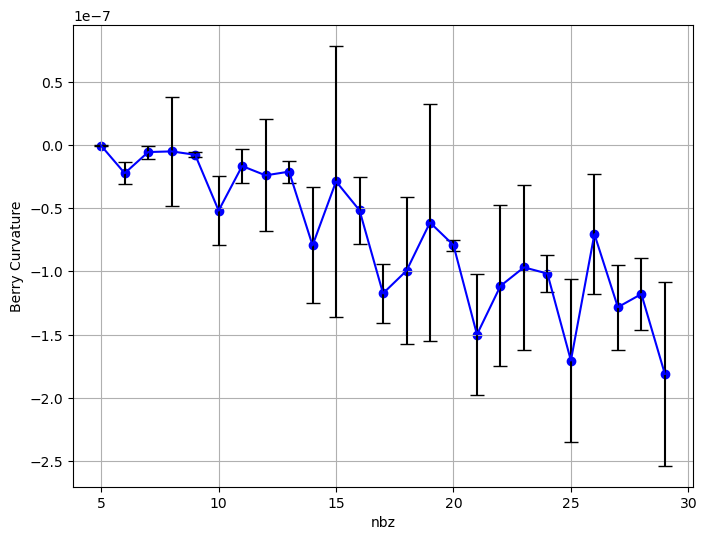

5

In [9]:
summ=berry_curv_k+berry_curv_k1
n=N
plt.figure(figsize=(8, 6))

#plt.errorbar(n, berry_curv_k, np.abs(summ), ecolor='black', color='red', capsize=5)
plt.errorbar(n, berry_curv_k1, np.abs(summ), ecolor='black', color='blue', capsize=5)

# plt.plot(n, berry_curv_k, color='red')
#plt.scatter(n, berry_curv_k, c='red')
# plt.plot(n, berry_curv_k1, color='blue')
plt.scatter(n, berry_curv_k1, c='blue')


# plt.plot(n, summ, color='green')
# plt.scatter(n, summ, color='green')
#plt.plot(NG, np.full(NG.shape, np.mean((berry_curv_k)[3:])))
#plt.plot(n, np.full(NG.shape, np.mean(summ[3:])), color='black')
#plt.plot(n, np.zeros(n.shape), color='black')
plt.grid(True)
#plt.ylim([-2.5e-7, -0.5e-7, ])
# plt.ylim([0.5e-7, 2.5e-7 ])
plt.ylabel('Berry Curvature')
plt.xlabel('nbz')
#plt.xticks(np.arange(30, 100, 5))
#plt.yticks(np.arange(-2e-7, 3e-7, 0.5e-7))
plt.show()

n[np.argmin(np.abs(summ))]

In [6]:

def fourier_coefficients_reshaped(a, ng, B1, B2, xi, yi, inv_eps):
    m_max, n_max = 2 * ng, 2 * ng
    m = np.arange(-m_max, m_max + 1)
    n = np.arange(-n_max, n_max + 1)
    M, N = np.meshgrid(m, n)

    G_len=M.size
    
    M_lin = M.reshape((G_len, 1), order='C')
    N_lin = N.reshape((G_len, 1), order='C')
    
    ni=len(xi)
    
    chi = np.zeros((G_len, 1), dtype=complex)
    for i in range(G_len):
       phi = ((B1[0]*M_lin[i] + B2[0]*N_lin[i]) * xi) + ((B1[1]*M_lin[i] + B2[1]*N_lin[i]) * yi)
       chi[i] = np.sum(inv_eps * np.exp(-1j * phi)) / ni

    chi_matrix = chi.reshape(M.shape, order='F')
    '''
    # Plot chi(G)
    plt.figure()
    plt.imshow(np.abs(chi_matrix), extent=[-m_max-0.5, m_max+0.5, -n_max-0.5, n_max+0.5],
               norm=matplotlib.colors.LogNorm())
    plt.colorbar(label=r'$\chi(G)$')
    plt.title('Chi(G) Matrix')
    plt.set_cmap('jet')
    plt.show()
'''
    
    #reshaping it
    mp = np.arange(-ng, ng + 1)
    np_arr = np.arange(-ng, ng + 1)
    Np, Mp = np.meshgrid(np_arr, mp)

    G_lenp = Mp.size
    Mp_lin = Mp.reshape(G_lenp, order='F')
    Np_lin = Np.reshape(G_lenp, order='F')

    
    chi_p = []
    
    for i in range(G_lenp):
        crop = (np.abs(M_lin + Mp_lin[i]) <= ng) & (np.abs(N_lin + Np_lin[i]) <= ng)
        ### didnt understand why
        chi_p.append(chi[crop])

    chi_p = np.column_stack(chi_p)
    '''
    # Plot Chi(G-G')
    plt.figure()
    plt.imshow(np.abs(chi_p), norm=matplotlib.colors.LogNorm())
    plt.xlabel("G'")
    plt.ylabel("G")
    plt.colorbar(label=r'$\chi(G-G)$')
    plt.title("Chi(G-G') Matrix")
    plt.show()
    '''
    return chi_p, chi, M_lin, N_lin, Mp_lin, Np_lin


#1'       

def initialize_BZ_parameters(a, numG, num_BZ, band_index=1):
    num_BZ=num_BZ
    kx = np.linspace(-2.4 * np.pi/a, 2.4 * np.pi/a, 2 * num_BZ) #wave vectors
    ky = np.linspace(-2.4 * np.pi/a, 2.4 * np.pi/a, 2 * num_BZ)
    KX, KY = np.meshgrid(kx, ky) 
    KX_lin = KX.reshape((KX.size, 1), order='F')
    KY_lin = KY.reshape((KY.size, 1), order='F')
    delta_kx = kx[1] - kx[0] 
    delta_ky = ky[1] - ky[0]
    band_index = band_index
    del_S = delta_kx * delta_ky
    return kx, ky, KX, KY, KX_lin, KY_lin, delta_kx, delta_ky, band_index, del_S


#2
def compute_berry_curvature(n, KX, KY, del_S, Hz_n_k, N_BZ, Mp_lin, Np_lin, B1, B2, khi_G_Gp, a, numG):
    KX_lin = KX.flatten()
    KY_lin = KY.flatten()
    H = [] #will store eigenvectors for each k-point
    dispe = np.zeros((numG, len(KX_lin))) #dispersion initialization (stores eig val)
    for i in range(len(KX_lin)): #to compute bloch eigenstates
    #h=eigen vector for n bands
        h, _ = Hz_n_k(n, [KX_lin[i], KY_lin[i]], i, Mp_lin, Np_lin, B1, B2, khi_G_Gp, a, dispe)
        H.append(h)
        #print(f"part1: {i / len(KX_lin) * 100:.2f}% completed", end='\r')

    H = np.array(H) 
    sz = KX.shape  #shape of k-grid
    # U=to store products of overlaps around each plaquette in k-space
    U = np.zeros((sz[0] - 1, sz[1] - 1), dtype=complex) #periodic bloch func
    
    for i in range(sz[0] - 1): #loop over each plaquette (grid in k-space)
        for j in range(sz[1] - 1):
            #indexing
            #Each small square plaquette in the k-grid is bordered by 4 points.
            id1 = np.ravel_multi_index((i, j), sz)
            id2 = np.ravel_multi_index((i, j + 1), sz)
            id3 = np.ravel_multi_index((i + 1, j + 1), sz)
            id4 = np.ravel_multi_index((i + 1, j), sz)
            
            #It computes the overlaps of neighboring Bloch states around the 
            #edges of this plaquette.
            #normalize
            #This step ensures gauge invariance (phase normalization).
            #These represent parallel transport of the Bloch function 
            #around the edges of the plaquette
            
            U1 = np.sum(np.conj(H[id1, :]) * H[id2, :]) #overlap 1 and 2
            U1 /= np.abs(U1)
            
            U2 = np.sum(np.conj(H[id2, :]) * H[id3, :])
            U2 /= np.abs(U2)
            
            U3 = np.sum(np.conj(H[id3, :]) * H[id4, :])
            U3 /= np.abs(U3)
            
            U4 = np.sum(np.conj(H[id4, :]) * H[id1, :])
            U4 /= np.abs(U4)
            
            U[i, j] = U1 * U2 * U3 * U4 #accumulated berry phase around a single plaquette
    
      #  print(f"part2: {i / (sz[0] - 1) * 100:.2f}% completed", end='\r')
    
    F = np.imag(np.log(U)) / del_S 
    #Complex log of the Wilson loop product, gives Berry phase.
    #np.imag=>Extract the Berry curvature contribution (phase) per plaquette.
    #/delS to get curvature density
    return F, H, dispe

#F: Berry curvature over the grid.
#H: Eigenvectors at each k-point.
#dispe: Energy dispersion.

def compute_eigenstates_and_eigenfrequencies(n, k, i_index, Mp_lin, Np_lin, B1, B2, khi_G_Gp, a, dispe):
    MM, MMP = np.meshgrid(Mp_lin, Mp_lin) #MM and MMP are transpose of each other
    NN, NNP = np.meshgrid(Np_lin, Np_lin)
    
    Gx = B1[0] * MM + B2[0] * NN #for rows
    Gy = B1[1] * MM + B2[1] * NN
    
    Gpx = B1[0] * MMP + B2[0] * NNP #for columns
    Gpy = B1[1] * MMP + B2[1] * NNP
    
    G_k_Gp_k = ((Gx + k[0]) * (Gpx + k[0])) + ((Gy + k[1]) * (Gpy + k[1])) 
    #Builds the Hamiltonian matrix theta in G-space.
    theta = khi_G_Gp * G_k_Gp_k
    
    w, V = np.linalg.eig(theta)
    dispe[:, i_index] = np.sqrt(np.sort(np.real(w))) * a / (2 * np.pi)

    w = np.real(w)
    IX = np.argsort(w)
    w = w[IX]
    
    w_n = w[n - 1]
    w_n = np.real(np.sqrt(w_n) * (a / (2 * np.pi)))
    Hznk = V[:, IX[n - 1]]
    
    i_index = i_index + 1
    
    return Hznk, w_n

def bwr(n):
    return np.interp(np.linspace(1, 3, n), [1, 2, 3], [[0, 0, 1], [1, 1, 1], [1, 0, 0]])

def high_symmetry_points():
    # Define high symmetry points
    Gamma = np.array([0, 0])
    M = np.array([0, (2 * (1 / 3) * (np.sqrt(3)))])
    K = np.array([2 * (-1/3), (2 * (1 / 3) * (np.sqrt(3)))])

    # Plot the triangle with the vertices G, M, and K
    vertices = np.array([Gamma, M, K, Gamma])  # Close the triangle by adding G at the end
    return Gamma, M, K, vertices

def plot_berry_curvature(F, KX, KY, a, Gamma, M, K, vertices):
    
    plt.figure()
    plt.title("Berry Curvature")
    plt.imshow(np.real(F), extent=(KX[0, 0] * a / (np.pi), KX[0, -1] * a / (np.pi),
                                KY[0, 0] * a / (np.pi), KY[-1, 0] * a / (np.pi)), 
            cmap='bwr', aspect='auto')
    # Plot the triangle edges
    plt.plot(vertices[:, 0], vertices[:, 1], color='black', linewidth=0.5)
    plt.text(Gamma[0], Gamma[1], 'G', color='black', fontsize=10, va='top')
    plt.text(M[0], M[1], 'M', color='black', fontsize=10, va='bottom')
    plt.text(K[0], K[1], 'K', color='black', fontsize=10, va='bottom')

    plt.xlabel('kx a/π')
    plt.ylabel('ky a/π')
    plt.colorbar()
    plt.clim(-np.max(np.abs(np.real(F))), np.max(np.abs(np.real(F))))
    plt.show()


<>:20: SyntaxWarning: invalid escape sequence '\c'
<>:49: SyntaxWarning: invalid escape sequence '\c'
<>:20: SyntaxWarning: invalid escape sequence '\c'
<>:49: SyntaxWarning: invalid escape sequence '\c'
C:\Users\Gargi Joshi\AppData\Local\Temp\ipykernel_9984\3939628140.py:20: SyntaxWarning: invalid escape sequence '\c'
  '''
C:\Users\Gargi Joshi\AppData\Local\Temp\ipykernel_9984\3939628140.py:49: SyntaxWarning: invalid escape sequence '\c'
  '''


1
2
3


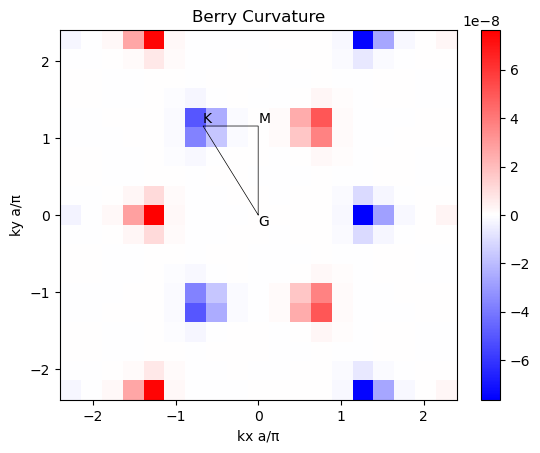

In [7]:
N_BZ=10
pw=[5]
for ng in pw:
    print(1)
    khi_G_Gp, khiG, M_lin, N_lin, Mp_lin, Np_lin= fourier_coefficients_reshaped(a, ng, B1, B2, xi, yi, inv_exy)
    numG=(2*ng+1)**2
    kx, ky, KX, KY, KX_lin, KY_lin, delta_kx, delta_ky, band_index, del_S = initialize_BZ_parameters(a, numG, N_BZ, band_index=1)
    print(2)
    n = band_index
    F, H, dispe = compute_berry_curvature(n, KX, KY, del_S, compute_eigenstates_and_eigenfrequencies, N_BZ, Mp_lin, Np_lin, B1, B2, khi_G_Gp, a, numG)
    dispe_reshaped = dispe.reshape((numG, 2 * N_BZ, 2 * N_BZ), order='C')
    print(3)
    Gamma, M, K, vertices=high_symmetry_points()
    plot_berry_curvature(F, KX, KY, a, Gamma, M, K, vertices)

In [ ]:
def eigenvalue_calculation_and_plotting(a, ng, B1, B2, khi_G_Gp, plot = True):
    from matplotlib.patches import Rectangle
    import time

    # Defining High Symmetry Points
    G = np.array([0, 0])
    M = np.array([0, (2 * np.pi / a * (1 / 3) * (np.sqrt(3)))])
    K = np.array([2 * np.pi / a * (-1/3), (2 * np.pi / a * (1 / 3) * (np.sqrt(3)))])

    L1 = np.linalg.norm(G - M)
    L2 = np.linalg.norm(M - K)
    L3 = np.linalg.norm(K - G)

    NG2M = 100
    N1 = int(NG2M)
    N2 = int(NG2M)
    N3 = int(NG2M)
    # N2 = int(np.round(N1 * L2/L1))
    # N3 = int(np.round(N1 * L3/L1))

    kx = np.concatenate([np.linspace(G[0], M[0], N1, endpoint=False), np.linspace(M[0], K[0], N2, endpoint=False),
                        np.linspace(K[0], G[0], N3)])
    ky = np.concatenate([np.linspace(G[1], M[1], N1, endpoint=False), np.linspace(M[1], K[1], N2, endpoint=False),
                        np.linspace(K[1], G[1], N3)])

    start_time = time.time()
    Gx = np.array([])
    Gy = np.array([])
    for i in range(-ng,ng+1):
        for j in range(-ng,ng+1):
            Gx = np.append(Gx,(i*B1[0]+j*B2[0]))
            Gy = np.append(Gy,(i*B1[1]+j*B2[1]))
            
    G = np.array([Gx,Gy]).T
    numG = len(G)

    start_time = time.time()
    # Precompute the G matrix components for easier access and broadcasting
    Gx = G[:, 0].reshape(1, numG)  # Shape (1, numG)
    Gy = G[:, 1].reshape(1, numG)  # Shape (1, numG)

    # Expand kx and ky for broadcasting with G
    kx_expanded = kx[:, np.newaxis]  # Shape (len(kx), 1)
    ky_expanded = ky[:, np.newaxis]  # Shape (len(kx), 1)

    # Precompute the components of the matrix multiplication
    kx_term = kx_expanded + Gx  # Shape (len(kx), numG)
    ky_term = ky_expanded + Gy  # Shape (len(kx), numG)

    # Compute the outer product and sum the necessary terms using broadcasting
    kx_term_outer = kx_term[:, :, np.newaxis] * kx_term[:, np.newaxis, :]  # Shape (len(kx), numG, numG)
    ky_term_outer = ky_term[:, :, np.newaxis] * ky_term[:, np.newaxis, :]  # Shape (len(kx), numG, numG)

    # Combine the kx and ky terms
    combined_terms = kx_term_outer + ky_term_outer  # Shape (len(kx), numG, numG)

    # Finally, compute the M matrix using broadcasting and element-wise multiplication
    M = khi_G_Gp[np.newaxis, :, :] * combined_terms  # Shape (len(kx), numG, numG)
                
    # Eigen-states computation
    dispe = np.zeros((numG, len(kx)))
    eig_vecs2=[]
    for countK in range(len(kx)):
        MM = M[countK, :, :]
        eigenvalues, eigenvectors = np.linalg.eig(MM)
        # dispe[:, countK] = np.sqrt(np.sort(np.real(eigenvalues))) * a / (2 * np.pi)
        real_vals=np.real(eigenvalues)
        idx=np.argsort(real_vals)
        dispe[:, countK] = np.sqrt(real_vals[idx]) * c
        eig_vecs2.append(eigenvectors[:, idx])

    if min(dispe[1, :]) > max(dispe[0, :]):
        band_gap = min(dispe[1, :]) - max(dispe[0, :]) 
        relative_band_gap = 2 * band_gap / (min(dispe[1, :]) + max(dispe[0, :]))
    else:
        band_gap = 0
        relative_band_gap = 0
        
    dirac_freq = (min(dispe[1, :]) + max(dispe[0, :]))/2 * (1/ (2 * np.pi))
    gap_at_K_point = dispe[1, N1 + N2 - 1] - dispe[0, N1 + N2 - 1]

    dispe_plot = dispe * 1e-12 * (1/(2*np.pi))
    # Plotting the band structure
    
    if plot:
        plt.figure(figsize=(8, 6), dpi=300)
        ax1 = plt.gca()
        for u in range(7):
            plt.plot(np.abs(dispe_plot[u, :]), 'r', linewidth=1)
            if min(dispe_plot[u + 1, :]) > max(dispe_plot[u, :]):
                rect_height = min(dispe_plot[u + 1, :]) - max(dispe_plot[u, :])
                rect = Rectangle((0, max(dispe_plot[u, :])), N1 + N2 + N3, rect_height, facecolor='lightblue')
                ax1.add_patch(rect)
                
        print("K point Band 1: ",dispe[0, N1 + N2 - 1]*1e-9*(1/(2*np.pi)), " GHz")
        print("K point Band 2: ",dispe[1, N1 + N2 - 1]*1e-9*(1/(2*np.pi)), " GHz")
        plt.title('Band Structure')
        plt.xticks([0, N1, N1 + N2, N1 + N2 + N3], ['G', 'M', 'K', 'G'])
        plt.ylabel('Frequency (THz)', fontsize=16)
        plt.xlabel('Wavevector', fontsize=16)
        plt.ylim([0, max(dispe_plot[6, :])])
        plt.xlim([0, N1+N2+N3])
        plt.grid(True)
        plt.show()
    return N1, N2, N3, eigenvalues, eig_vecs2, dispe, G, Gx, Gy, numG, band_gap, relative_band_gap, dirac_freq, gap_at_K_point


In [ ]:
N1, N2, N3, eigenvalues, eig_vecs2, dispe, G, Gx, Gy, numG, band_gap, relative_band_gap, dirac_freq, gap_at_K_point=eigenvalue_calculation_and_plotting(a, ng, B1, B2, chi, plot = True)

In [2]:
def fourier_coefficients(inv_exy, X, Y, ng, B1, B2, plot=False):
    imax=2*ng
    m=np.arange(-imax, imax+1)
    n=np.arange(-imax, imax+1)
    M, N=np.meshgrid(m, n)

    M_lin=M.reshape((-1, 1), order='C')
    N_lin=N.reshape((-1, 1), order='C')
    lg=M.size
    xi=X.ravel()
    yi=Y.ravel()
    ni=len(xi)
    inv_exy=inv_exy.ravel()
    chiG=np.zeros((lg, 1), dtype=complex)
    for i in range(lg):
        phi=(B1[0]*M_lin[i]+B2[0]*N_lin[i])*xi+(B1[1]*M_lin[i]+B2[1]*N_lin[i])*yi
        integrand=inv_exy*np.exp(-1j*phi)
        chiG[i]=np.sum(integrand)/ni
    chi_plt=chiG.reshape(M.shape, order='F')
    if plot:
        plt.imshow(np.abs(chi_plt), norm=matplotlib.colors.LogNorm())
        plt.xlabel('m')
        plt.ylabel('n')
        plt.colorbar(label=r'$\chi(G)$')
        plt.title('Khi(G) matrix')
        plt.set_cmap('jet')
        plt.show()

    mp=np.arange(-ng, ng+1)
    np_arr=np.arange(-ng, ng+1)
    Np, Mp=np.meshgrid(np_arr, mp)

    G_lenp=Mp.size
    Mp_lin=Mp.reshape(G_lenp, order='F')
    Np_lin=Np.reshape(G_lenp, order='F')

    chiGp=[]
    dM=dN=ng

    for i in range(G_lenp):
        crop = (np.abs(M_lin + Mp_lin[i]) <= dM) & (np.abs(N_lin + Np_lin[i]) <= dN)
        chiGp.append(chiG[crop])

    chiGp = np.column_stack(chiGp)

    if plot:
        plt.axes().set_aspect(1)
        plt.imshow(np.abs(chiGp), norm=matplotlib.colors.LogNorm())
        plt.xlabel("G'")
        plt.ylabel("G")
        plt.colorbar(label="\chi(G-G')")
        plt.title("Khi(G-G') matrix")
        plt.show()
        
    return chiG, chiGp, M_lin, N_lin, Mp_lin, Np_lin

chi0, chi, M_lin, N_lin, Mp_lin, Np_lin=fourier_coefficients(inv_exy_rect, x_rect, y_rect, ng, B1, B2, plot=True)

<>:51: SyntaxWarning: invalid escape sequence '\c'
<>:51: SyntaxWarning: invalid escape sequence '\c'
C:\Users\Gargi Joshi\AppData\Local\Temp\ipykernel_32096\367816304.py:51: SyntaxWarning: invalid escape sequence '\c'
  plt.colorbar(label="\chi(G-G')")
C:\Users\Gargi Joshi\AppData\Local\Temp\ipykernel_32096\367816304.py:51: SyntaxWarning: invalid escape sequence '\c'
  plt.colorbar(label="\chi(G-G')")


NameError: name 'inv_exy_rect' is not defined

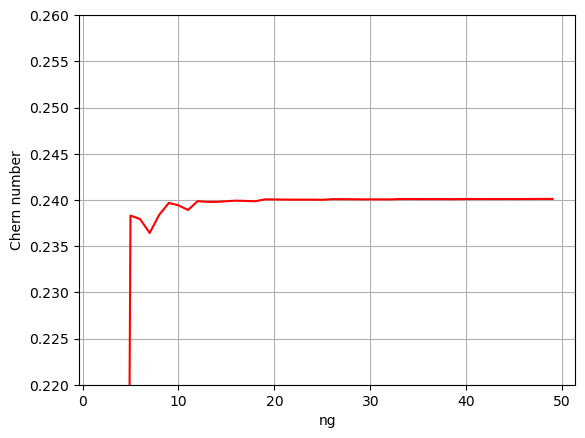

In [16]:
chernk=np.array([-0.08735701798830557, 0.041739313498925915, 0.043881932343203464, 0.23831018233248996, 0.23792860697651388, 0.23642470554338282, 0.23839780445198974, 0.23967266194616874, 0.23941743074696614, 0.23891071473453426, 0.23986480725949766, 0.23979137092486746, 0.23978694616944923, 0.23985934178577847, 0.2399182381885688, 0.2398921255892098, 0.239853320887334, 0.24005985910474478, 0.2400558629043418, 0.24003920884112548, 0.24003074480390676, 0.24003254285360762, 0.2400304944550108, 0.24001864582246213, 0.24008413131586712, 0.24008008984324597, 0.24007350292954557, 0.24006510218072397, 0.24006258882477718, 0.2400630955488692, 0.24006108906672483, 0.24009433799701302, 0.24009542327926803, 0.2400953248563322, 0.24009161563476072, 0.24008929098433954, 0.24008629182573055, 0.24008252021341145, 0.24009885349642396, 0.24009867105029864, 0.24009863107097124, 0.24009753763946035, 0.2400985840627352, 0.24009808925846057, 0.24009727188178628, 0.24010856861927599, 0.2401093760024706, 0.24010958832331103])
chernk1=np.array([-7.968172964477631e-14, 0.17460827763105666, -0.20845611812875267, -0.237701664445479, -0.23934214285069202, -0.23908984668430572, -0.23892001856372153, -0.2390948874223582, -0.23842440931858525, -0.23875933777611238, -0.2394790278437157, -0.23977642458997261, -0.23984080661610271, -0.2397878278222585, -0.2398167183615609, -0.23988986040382967, -0.23995412896349533, -0.2400051828950188, -0.24000701622589546, -0.24003111513828967, -0.2400489886235158, -0.24004725684471231, -0.24003425795217678, -0.2400236725908717, -0.24003507033938126, -0.2400310402391763, -0.24003598205125162, -0.24004381957018253, -0.24005089271678418, -0.24005516550532074, -0.24005916447061657, -0.24007474213462648, -0.24007838351034477, -0.24007898904526107, -0.2400759994592287, -0.24007278944572039, -0.24006968791838895, -0.2400682077193457, -0.24007556612128778, -0.24007844198850042, -0.2400812961462022, -0.2400836096494529, -0.2400867480685057, -0.2400891242450146, -0.24009112121454643, -0.24009723201087002, -0.2400992576811244, -0.2401004195421927])


summ=chernk+chernk1

n=np.arange(2, 50)
plt.errorbar(n, chernk, color='red', ecolor='black', capsize=5)
# plt.scatter(n, chernk, c='red')

# plt.errorbar(n, chernk1,  color='blue', ecolor='black', capsize=5)
# plt.scatter(n, chernk1, c='blue')

# plt.plot(n, summ, color='green')
# plt.scatter(n, summ, c='green')
# plt.plot(n, np.zeros(n.shape), color='black')

plt.ylabel("Chern number")
plt.xlabel("ng")
# plt.yticks(np.arange(-0.30, 0.2, 0.02))
#plt.ylim([-0.05, -0.16])
plt.ylim([0.22, 0.26])
plt.grid(True)
plt.show()